In [6]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import holidays

In [7]:
# Load your time series data
df = pd.read_csv('2223TaftLSTM.csv')
df.tail(5)

Day              Date          DateAndTime   Time  Entry  \
14595  Sunday  12/31/2023 19:00  31.12.2023 19.00.00  19:00   1681   
14596  Sunday  12/31/2023 20:00  31.12.2023 20.00.00  20:00    297   
14597  Sunday  12/31/2023 21:00  31.12.2023 21.00.00  21:00      0   
14598  Sunday  12/31/2023 22:00  31.12.2023 22.00.00  22:00      0   
14599  Sunday  12/31/2023 23:00  31.12.2023 23.00.00  23:00      0   

       is_weekend  rain_class  rain_amount rain_desc  
14595           1           0          0.0   No Rain  
14596           1           0          0.0   No Rain  
14597           1           0          0.0   No Rain  
14598           1           0          0.0   No Rain  
14599           1           0          0.0   No Rain

In [8]:
ph_holidays = holidays.PH()
df['is_holiday'] = df['Date'].apply(lambda x: 1 if x in ph_holidays else 0)
df.head(5)

Day           Date          DateAndTime  Time  Entry  is_weekend  \
0  Saturday  1/1/2022 4:00  01.01.2022 04.00.00  4:00      0           1   
1  Saturday  1/1/2022 5:00  01.01.2022 05.00.00  5:00      0           1   
2  Saturday  1/1/2022 6:00  01.01.2022 06.00.00  6:00    525           1   
3  Saturday  1/1/2022 7:00  01.01.2022 07.00.00  7:00    610           1   
4  Saturday  1/1/2022 8:00  01.01.2022 08.00.00  8:00    684           1   

   rain_class  rain_amount rain_desc  is_holiday  
0           0          0.0   No Rain           1  
1           0          0.0   No Rain           1  
2           0          0.0   No Rain           1  
3           0          0.0   No Rain           1  
4           0          0.0   No Rain           1

In [9]:
df.drop(['Date', 'Time', 'rain_amount', 'rain_desc'], axis=1, inplace=True)
df.head(31)

Day          DateAndTime  Entry  is_weekend  rain_class  is_holiday
0   Saturday  01.01.2022 04.00.00      0           1           0           1
1   Saturday  01.01.2022 05.00.00      0           1           0           1
2   Saturday  01.01.2022 06.00.00    525           1           0           1
3   Saturday  01.01.2022 07.00.00    610           1           0           1
4   Saturday  01.01.2022 08.00.00    684           1           0           1
5   Saturday  01.01.2022 09.00.00    770           1           0           1
6   Saturday  01.01.2022 10.00.00   1022           1           0           1
7   Saturday  01.01.2022 11.00.00   1248           1           0           1
8   Saturday  01.01.2022 12.00.00   1048           1           0           1
9   Saturday  01.01.2022 13.00.00   1199           1           0           1
10  Saturday  01.01.2022 14.00.00   1174           1           0           1
11  Saturday  01.01.2022 15.00.00   1249           1           0           1
12  Saturday  01.01.2022 16.00.00   1385           1           0           1
13  Saturday  01.01.2022 17.00.00   1332           1           0           1
14  Saturday  01.01.2022 18.00.00   1401           1           0           1
15  Saturday  01.01.2022 19.00.00   1322           1           0           1
16  Saturday  01.01.2022 20.00.00   1033           1           0           1
17  Saturday  01.01.2022 21.00.00    790           1           0           1
18  Saturday  01.01.2022 22.00.00     71           1           0           1
19  Saturday  01.01.2022 23.00.00      0           1           0           1
20    Sunday  02.01.2022 04.00.00      0           1           0           0
21    Sunday  02.01.2022 05.00.00    602           1           0           0
22    Sunday  02.01.2022 06.00.00    676           1           0           0
23    Sunday  02.01.2022 07.00.00    853           1           0           0
24    Sunday  02.01.2022 08.00.00    972           1           0           0
25    Sunday  02.01.2022 09.00.00   1232           1           0           0
26    Sunday  02.01.2022 10.00.00   1236           1           0           0
27    Sunday  02.01.2022 11.00.00   1391           1           0           0
28    Sunday  02.01.2022 12.00.00   1452           1           0           0
29    Sunday  02.01.2022 13.00.00   1606           1           0           0
30    Sunday  02.01.2022 14.00.00   1632           1           0           0

In [10]:
df['Date Time'] = pd.to_datetime(df['DateAndTime'], format='%d.%m.%Y %H.%M.%S')
df['hour'] = df['Date Time'].dt.hour
df['day_of_week'] = df['Date Time'].dt.dayofweek
df['month'] = df['Date Time'].dt.month
df['year'] = df['Date Time'].dt.year
df.drop(['DateAndTime', 'Day', 'is_weekend'], axis=1, inplace=True)
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x in [5, 6] else 0)

model_features = ['hour', 'day_of_week', 'is_weekend','is_holiday', 'month', 'year', 'rain_class']
df_model = df[model_features]

df.head(30)

Entry  rain_class  is_holiday           Date Time  hour  day_of_week  \
0       0           0           1 2022-01-01 04:00:00     4            5   
1       0           0           1 2022-01-01 05:00:00     5            5   
2     525           0           1 2022-01-01 06:00:00     6            5   
3     610           0           1 2022-01-01 07:00:00     7            5   
4     684           0           1 2022-01-01 08:00:00     8            5   
5     770           0           1 2022-01-01 09:00:00     9            5   
6    1022           0           1 2022-01-01 10:00:00    10            5   
7    1248           0           1 2022-01-01 11:00:00    11            5   
8    1048           0           1 2022-01-01 12:00:00    12            5   
9    1199           0           1 2022-01-01 13:00:00    13            5   
10   1174           0           1 2022-01-01 14:00:00    14            5   
11   1249           0           1 2022-01-01 15:00:00    15            5   
12   1385           0           1 2022-01-01 16:00:00    16            5   
13   1332           0           1 2022-01-01 17:00:00    17            5   
14   1401           0           1 2022-01-01 18:00:00    18            5   
15   1322           0           1 2022-01-01 19:00:00    19            5   
16   1033           0           1 2022-01-01 20:00:00    20            5   
17    790           0           1 2022-01-01 21:00:00    21            5   
18     71           0           1 2022-01-01 22:00:00    22            5   
19      0           0           1 2022-01-01 23:00:00    23            5   
20      0           0           0 2022-01-02 04:00:00     4            6   
21    602           0           0 2022-01-02 05:00:00     5            6   
22    676           0           0 2022-01-02 06:00:00     6            6   
23    853           0           0 2022-01-02 07:00:00     7            6   
24    972           0           0 2022-01-02 08:00:00     8            6   
25   1232           0           0 2022-01-02 09:00:00     9            6   
26   1236           0           0 2022-01-02 10:00:00    10            6   
27   1391           0           0 2022-01-02 11:00:00    11            6   
28   1452           0           0 2022-01-02 12:00:00    12            6   
29   1606           0           0 2022-01-02 13:00:00    13            6   

    month  year  is_weekend  
0       1  2022           1  
1       1  2022           1  
2       1  2022           1  
3       1  2022           1  
4       1  2022           1  
5       1  2022           1  
6       1  2022           1  
7       1  2022           1  
8       1  2022           1  
9       1  2022           1  
10      1  2022           1  
11      1  2022           1  
12      1  2022           1  
13      1  2022           1  
14      1  2022           1  
15      1  2022           1  
16      1  2022           1  
17      1  2022           1  
18      1  2022           1  
19      1  2022           1  
20      1  2022           1  
21      1  2022           1  
22      1  2022           1  
23      1  2022           1  
24      1  2022           1  
25      1  2022           1  
26      1  2022           1  
27      1  2022           1  
28      1  2022           1  
29      1  2022           1

In [11]:
# Display the DataFrame before normalization
print(df_model.dtypes)
df_model.tail(30)


hour           int32
day_of_week    int32
is_weekend     int64
is_holiday     int64
month          int32
year           int32
rain_class     int64
dtype: object


hour  day_of_week  is_weekend  is_holiday  month  year  rain_class
14570    14            5           1           1     12  2023           1
14571    15            5           1           1     12  2023           1
14572    16            5           1           1     12  2023           1
14573    17            5           1           1     12  2023           1
14574    18            5           1           1     12  2023           1
14575    19            5           1           1     12  2023           1
14576    20            5           1           1     12  2023           1
14577    21            5           1           1     12  2023           1
14578    22            5           1           1     12  2023           1
14579    23            5           1           1     12  2023           1
14580     4            6           1           1     12  2023           0
14581     5            6           1           1     12  2023           0
14582     6            6           1           1     12  2023           0
14583     7            6           1           1     12  2023           0
14584     8            6           1           1     12  2023           0
14585     9            6           1           1     12  2023           0
14586    10            6           1           1     12  2023           0
14587    11            6           1           1     12  2023           0
14588    12            6           1           1     12  2023           0
14589    13            6           1           1     12  2023           0
14590    14            6           1           1     12  2023           0
14591    15            6           1           1     12  2023           0
14592    16            6           1           1     12  2023           0
14593    17            6           1           1     12  2023           0
14594    18            6           1           1     12  2023           0
14595    19            6           1           1     12  2023           0
14596    20            6           1           1     12  2023           0
14597    21            6           1           1     12  2023           0
14598    22            6           1           1     12  2023           0
14599    23            6           1           1     12  2023           0

In [12]:
from sklearn.preprocessing import MinMaxScaler
import joblib

df_model = df[model_features + ['Entry']]

# Normalize all features except 'Entry'
scaler = MinMaxScaler(feature_range=(0, 1))
df_model[df_model.columns[:-1]] = scaler.fit_transform(df_model[df_model.columns[:-1]])

# Save the scaler for the features
joblib.dump(scaler, 'model/scaler_features.pkl')

# Ensure 'Entry' column exists in df_model
if 'Entry' in df_model.columns:
    # Normalize the 'Entry' column separately
    scaler_entry = MinMaxScaler(feature_range=(0, 1))
    df_model['Entry'] = scaler_entry.fit_transform(df_model[['Entry']])
    
    # Save the scaler for the 'Entry' column
    joblib.dump(scaler_entry, 'model/scaler_entry.pkl')
else:
    print("Error: 'Entry' column not found in df_model")


C:\Users\inspiron-7460\AppData\Local\Temp\ipykernel_8472\1949296345.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model[df_model.columns[:-1]] = scaler.fit_transform(df_model[df_model.columns[:-1]])
C:\Users\inspiron-7460\AppData\Local\Temp\ipykernel_8472\1949296345.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Entry'] = scaler_entry.fit_transform(df_model[['Entry']])


In [13]:
# Display the DataFrame after normalization
print("After normalization:")
df_model.head(30)

After normalization:


hour  day_of_week  is_weekend  is_holiday  month  year  rain_class  \
0   0.000000     0.833333         1.0         1.0    0.0   0.0         0.0   
1   0.052632     0.833333         1.0         1.0    0.0   0.0         0.0   
2   0.105263     0.833333         1.0         1.0    0.0   0.0         0.0   
3   0.157895     0.833333         1.0         1.0    0.0   0.0         0.0   
4   0.210526     0.833333         1.0         1.0    0.0   0.0         0.0   
5   0.263158     0.833333         1.0         1.0    0.0   0.0         0.0   
6   0.315789     0.833333         1.0         1.0    0.0   0.0         0.0   
7   0.368421     0.833333         1.0         1.0    0.0   0.0         0.0   
8   0.421053     0.833333         1.0         1.0    0.0   0.0         0.0   
9   0.473684     0.833333         1.0         1.0    0.0   0.0         0.0   
10  0.526316     0.833333         1.0         1.0    0.0   0.0         0.0   
11  0.578947     0.833333         1.0         1.0    0.0   0.0         0.0   
12  0.631579     0.833333         1.0         1.0    0.0   0.0         0.0   
13  0.684211     0.833333         1.0         1.0    0.0   0.0         0.0   
14  0.736842     0.833333         1.0         1.0    0.0   0.0         0.0   
15  0.789474     0.833333         1.0         1.0    0.0   0.0         0.0   
16  0.842105     0.833333         1.0         1.0    0.0   0.0         0.0   
17  0.894737     0.833333         1.0         1.0    0.0   0.0         0.0   
18  0.947368     0.833333         1.0         1.0    0.0   0.0         0.0   
19  1.000000     0.833333         1.0         1.0    0.0   0.0         0.0   
20  0.000000     1.000000         1.0         0.0    0.0   0.0         0.0   
21  0.052632     1.000000         1.0         0.0    0.0   0.0         0.0   
22  0.105263     1.000000         1.0         0.0    0.0   0.0         0.0   
23  0.157895     1.000000         1.0         0.0    0.0   0.0         0.0   
24  0.210526     1.000000         1.0         0.0    0.0   0.0         0.0   
25  0.263158     1.000000         1.0         0.0    0.0   0.0         0.0   
26  0.315789     1.000000         1.0         0.0    0.0   0.0         0.0   
27  0.368421     1.000000         1.0         0.0    0.0   0.0         0.0   
28  0.421053     1.000000         1.0         0.0    0.0   0.0         0.0   
29  0.473684     1.000000         1.0         0.0    0.0   0.0         0.0   

       Entry  
0   0.000000  
1   0.000000  
2   0.082121  
3   0.095417  
4   0.106992  
5   0.120444  
6   0.159862  
7   0.195214  
8   0.163929  
9   0.187549  
10  0.183638  
11  0.195370  
12  0.216643  
13  0.208353  
14  0.219146  
15  0.206789  
16  0.161583  
17  0.123573  
18  0.011106  
19  0.000000  
20  0.000000  
21  0.094165  
22  0.105741  
23  0.133427  
24  0.152041  
25  0.192711  
26  0.193336  
27  0.217582  
28  0.227123  
29  0.251212

In [14]:
print("After normalization:")
print(df_model.dtypes)

After normalization:
hour           float64
day_of_week    float64
is_weekend     float64
is_holiday     float64
month          float64
year           float64
rain_class     float64
Entry          float64
dtype: object


<Axes: >

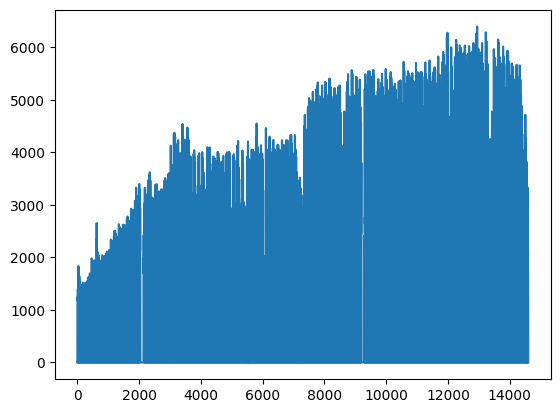

In [15]:
entry = df['Entry']
entry.plot()

In [16]:
def df_to_X_y(df, window_size=20):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [r for r in df_as_np[i:i + window_size]]
        X.append(row)
        label = df_as_np[i + window_size][7]  # 'Entry' is the 8th column (index 7)
        y.append(label)
    return np.array(X), np.array(y)

In [17]:
X, y = df_to_X_y(df_model)
X.shape, y.shape

((14580, 20, 8), (14580,))

In [18]:
# Determine the split points
train_split_point = int(len(X) * 0.8)
valntest_split_point = int(len(X) * 0.9)

# Split the data
X_train, X_val, X_test = X[:train_split_point], X[train_split_point:valntest_split_point], X[valntest_split_point:]
y_train, y_val, y_test = y[:train_split_point], y[train_split_point:valntest_split_point], y[valntest_split_point:]

# Print the shapes to verify the splits
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((11664, 20, 8), (11664,), (1458, 20, 8), (1458,), (1458, 20, 8), (1458,))

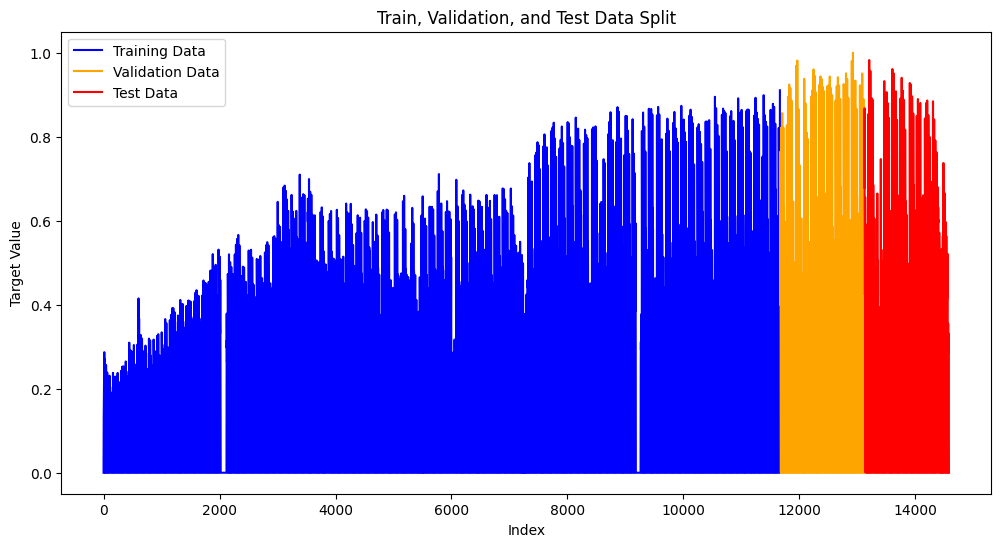

In [19]:
import matplotlib.pyplot as plt
# Visualization

date_time = df['Date Time']
plt.figure(figsize=(12, 6))

# Plot the training data
plt.plot(range(train_split_point), y_train, label='Training Data', color='blue')

# Plot the validation data
plt.plot(range(train_split_point, valntest_split_point), y_val, label='Validation Data', color='orange')

# Plot the test data
plt.plot(range(valntest_split_point, len(X)), y_test, label='Test Data', color='red')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('Train, Validation, and Test Data Split')
plt.legend()

# Show the plot
plt.show()

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [21]:
model = Sequential()
model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64))
model.add(Dropout(0.2))
model.add(Dense(32, activation='linear'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 20, 64)         │        18,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,825 (210.25 KB)

 Trainable params: 53,825 (210.25 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define the ModelCheckpoint callback with the correct file path
os.makedirs('model', exist_ok=True)
cp1 = ModelCheckpoint(filepath='model/best_lstm.keras', save_best_only=True, monitor='val_loss', mode='min')

# Use early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[cp1, early_stopping])


Epoch 1/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - loss: 0.0284 - val_loss: 0.0150
Epoch 2/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - loss: 0.0079 - val_loss: 0.0036
Epoch 3/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 19s 42ms/step - loss: 0.0047 - val_loss: 0.0050
Epoch 4/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 18s 36ms/step - loss: 0.0037 - val_loss: 0.0027
Epoch 5/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 15s 42ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 6/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 19s 37ms/step - loss: 0.0029 - val_loss: 0.0024
Epoch 7/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - loss: 0.0027 - val_loss: 0.0034
Epoch 8/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 14s 39ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 9/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 10/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 22s 38ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 11/100
365/365 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - loss: 0.0021 - val_loss: 0.0013
Epoch 12/100
365/36

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import plotly.graph_objects as go

# Extract the 'Date Time' column for the test set
date_time_test = df['Date Time'][-len(y_test):]  # Use the date time series for the test set

# Load the scaler for inverse transformation
scaler_entry = joblib.load('model/scaler_entry.pkl')

# Make predictions on the test dataset
y_pred = model.predict(X_test)

# Check the length of y_pred to ensure it matches y_test
#print(f"Length of y_pred: {len(y_pred)}")
#print(f"Length of y_test: {len(y_test)}")

# Inverse transform the predictions and actual values
# Create a DataFrame to hold the predictions and actual values
df_pred = pd.DataFrame(y_pred, columns=['Entry'])
df_actual = pd.DataFrame(y_test, columns=['Entry'])

# Inverse transform the 'Entry' column
y_pred_inv = scaler_entry.inverse_transform(df_pred)
y_true_inv = scaler_entry.inverse_transform(df_actual)

# Round the predictions to the nearest whole number and ensure non-negative values
y_pred_inv = np.round(np.maximum(y_pred_inv, 0))
y_true_inv = np.round(np.maximum(y_true_inv, 0))

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae = mean_absolute_error(y_true_inv, y_pred_inv)
r2 = r2_score(y_true_inv, y_pred_inv)
# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[2]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

# Plot the results with 'Date Time' as the x-axis using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=date_time_test, y=y_true_inv.flatten(), mode='lines', name='Actual Test Values'))
fig.add_trace(go.Scatter(x=date_time_test, y=y_pred_inv.flatten(), mode='lines', name='Forecasted Values'))

fig.update_layout(title='LSTM Model Forecast vs Actual Test Values', xaxis_title='Date Time', yaxis_title='Entry', legend_title='Legend')

fig.show()

46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step
Root Mean Squared Error (RMSE): 295.63123044937186
Mean Absolute Error (MAE): 177.67764060356652
R-squared (R²): 0.9523352289805691
Adjusted R-squared: 0.95207206944423


In [24]:
print(f"Length of the dataset: {len(X)}")

# Make predictions on the entire dataset
y_pred = model.predict(X)

# Inverse transform the predictions and actual values
# Create a DataFrame to hold the predictions and actual values
df_pred = pd.DataFrame(y_pred, columns=['Entry'])
df_actual = pd.DataFrame(y, columns=['Entry'])

# Inverse transform the 'Entry' column
y_pred_inv = scaler_entry.inverse_transform(df_pred)
y_true_inv = scaler_entry.inverse_transform(df_actual)

# Round the predictions to the nearest whole number and ensure non-negative values
y_pred_inv = np.round(np.maximum(y_pred_inv, 0))
y_true_inv = np.round(np.maximum(y_true_inv, 0))

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
mae = mean_absolute_error(y_true_inv, y_pred_inv)
r2 = r2_score(y_true_inv, y_pred_inv)
# Calculate adjusted R-squared
n = len(y_test)
p = X_test.shape[2]
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")
print(f"Adjusted R-squared: {adjusted_r2}")

# Create a DataFrame with all features and the true and forecasted values
df_features_with_predictions = df.iloc[-len(y_true_inv):].copy()

# Rename the 'Entry' column to 'Actual Values'
df_features_with_predictions.rename(columns={'Entry': 'Actual Values'}, inplace=True)

# Add the 'Forecasted Values' column
df_features_with_predictions['Forecasted Values'] = y_pred_inv.flatten()

# Reorder the columns
df_features_with_predictions = df_features_with_predictions[['Date Time', 'hour', 'day_of_week', 'is_weekend', 'is_holiday', 'month', 'year', 'rain_class', 'Actual Values', 'Forecasted Values']]

# Plot the results with 'Date Time' as the x-axis using Plotly
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_features_with_predictions['Date Time'], y=df_features_with_predictions['Actual Values'], mode='lines', name='Actual Values'))
fig.add_trace(go.Scatter(x=df_features_with_predictions['Date Time'], y=df_features_with_predictions['Forecasted Values'], mode='lines', name='Forecasted Values'))

fig.update_layout(title='LSTM Model Forecast vs Actual Values', xaxis_title='Date Time', yaxis_title='Entry', legend_title='Legend')

fig.show()

Length of the dataset: 14580
456/456 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step
Root Mean Squared Error (RMSE): 193.1607777909831
Mean Absolute Error (MAE): 123.79074074074074
R-squared (R²): 0.9760483436913429
Adjusted R-squared: 0.9759161054232481


In [25]:
import plotly.express as px

# Group the data by hour and calculate the mean for Actual Values and Forecasted Values
hourly_trends = df_features_with_predictions.groupby('hour')[['Actual Values', 'Forecasted Values']].mean().reset_index()

# Display the hourly trends DataFrame
print(hourly_trends)

# Plot the hourly trends using Plotly
fig = px.line(hourly_trends, x='hour', y=['Actual Values', 'Forecasted Values'], title='Hourly Trends of Entry Data')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Entry',
    legend_title='Legend'
)

# Show the plot
fig.show()

    hour  Actual Values  Forecasted Values
0      4       2.368999          11.707819
1      5    1920.262003        2012.179688
2      6    2959.832647        3050.071289
3      7    3524.201646        3567.577393
4      8    3097.423868        3154.731201
5      9    2695.054870        2663.480225
6     10    2336.684499        2423.705078
7     11    2327.632373        2301.529541
8     12    2317.906722        2265.707764
9     13    2241.262003        2250.760010
10    14    2239.145405        2270.631104
11    15    2374.005487        2432.890381
12    16    2720.604938        2792.239990
13    17    3045.349794        3104.288086
14    18    2924.836763        3038.847656
15    19    2652.702332        2638.995850
16    20    2161.798354        2186.318359
17    21    1515.674897        1570.149536
18    22      76.412894          37.670780
19    23       0.137174           7.211248


In [26]:
# Group the data by day of the week and calculate the mean for Actual Values and Forecasted Values
daily_trends = df_features_with_predictions.groupby('day_of_week')[['Actual Values', 'Forecasted Values']].mean().reset_index()

# Sort the daily trends DataFrame to start with Sunday
daily_trends['day_of_week'] = daily_trends['day_of_week'].map({6: 'Sunday', 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday'})
daily_trends = daily_trends.set_index('day_of_week').reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']).reset_index()

# Plot the daily trends using Plotly
fig = px.line(daily_trends, x='day_of_week', y=['Actual Values', 'Forecasted Values'], title='Daily Trends of Entry Data')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Day of the Week',
    yaxis_title='Entry',
    legend_title='Legend',
    xaxis=dict(
        tickmode='array',
        tickvals=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'],
        ticktext=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    )
)

# Show the plot
fig.show()

In [27]:
import pandas as pd
import plotly.express as px

# Group the data by month and calculate the mean for Actual Values and Forecasted Values
yearly_trends = df_features_with_predictions.groupby('month')[['Actual Values', 'Forecasted Values']].mean().reset_index()

# Map the month numbers to month names
yearly_trends['month'] = yearly_trends['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Sort the DataFrame by month order
yearly_trends['month'] = pd.Categorical(yearly_trends['month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
yearly_trends = yearly_trends.sort_values('month')

# Plot the yearly trends using Plotly
fig = px.line(yearly_trends, x='month', y=['Actual Values', 'Forecasted Values'], title='Yearly Trends of Entry Data')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Entry',
    legend_title='Legend',
    xaxis=dict(
        tickmode='array',
        tickvals=[
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ],
        ticktext=[
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ]
    )
)

# Show the plot
fig.show()

In [ ]:
import pandas as pd
import plotly.express as px

# Group the data by month and calculate the mean for Actual Values and Forecasted Values
yearly_trends = df_features_with_predictions.groupby('month')[['Actual Values', 'Forecasted Values']].mean().reset_index()

# Map the month numbers to month names
yearly_trends['month'] = yearly_trends['month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Sort the DataFrame by month order
yearly_trends['month'] = pd.Categorical(yearly_trends['month'], categories=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
], ordered=True)
yearly_trends = yearly_trends.sort_values('month')

# Plot the yearly trends using Plotly
fig = px.line(yearly_trends, x='month', y=['Actual Values', 'Forecasted Values'], title='Yearly Trends of Entry Data')

# Update layout for better visualization
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='Entry',
    legend_title='Legend',
    xaxis=dict(
        tickmode='array',
        tickvals=[
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ],
        ticktext=[
            'January', 'February', 'March', 'April', 'May', 'June',
            'July', 'August', 'September', 'October', 'November', 'December'
        ]
    )
)

# Show the plot
fig.show()

In [28]:
# DO NOT RUN THIS!
'''from sklearn.model_selection import TimeSeriesSplit
# Cross-Validation
def time_series_cv(df_model, n_splits=5, window_size=19):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    
    all_rmse = []
    all_mae = []
    all_r2 = []
    
    for train_index, val_index in tscv.split(df_model):
        df_train, df_val = df_model.iloc[train_index], df_model.iloc[val_index]
        
        # Prepare data
        X_train, y_train = df_to_X_y(df_train, window_size)
        X_val, y_val = df_to_X_y(df_val, window_size)
        
        # Build the model
        model = Sequential()
        model.add(InputLayer((X_train.shape[1], X_train.shape[2])))
        model.add(LSTM(64, return_sequences=True))
        model.add(Dropout(0.2))
        model.add(LSTM(64))
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='linear'))
        model.add(Dense(1, activation='linear'))

        # Compile the model
        model.compile(optimizer='adam', loss='mean_squared_error')

        # Fit the model
        model.fit(X_train, y_train, epochs=100, verbose=0)

        # Make predictions
        y_pred = model.predict(X_val)

        # Inverse transform the predictions and actual values
        df_pred = pd.DataFrame(y_pred, columns=['Entry'])
        df_actual = pd.DataFrame(y_val, columns=['Entry'])
        y_pred_inv = scaler_entry.inverse_transform(df_pred)
        y_true_inv = scaler_entry.inverse_transform(df_actual)

        # Round the predictions to the nearest whole number
        y_pred_inv = np.round(np.maximum(y_pred_inv, 0))
        y_true_inv = np.round(np.maximum(y_true_inv, 0))

        # Calculate evaluation metrics
        rmse = np.sqrt(mean_squared_error(y_true_inv, y_pred_inv))
        mae = mean_absolute_error(y_true_inv, y_pred_inv)
        r2 = r2_score(y_true_inv, y_pred_inv)

        all_rmse.append(rmse)
        all_mae.append(mae)
        all_r2.append(r2)

    return all_rmse, all_mae, all_r2

# Perform Time Series Cross-Validation
rmse_list, mae_list, r2_list = time_series_cv(df_model)

# Print the results
print("RMSE for each fold:", rmse_list)
print("Mean RMSE:", np.mean(rmse_list))
print("MAE for each fold:", mae_list)
print("Mean MAE:", np.mean(mae_list))
print("R-squared for each fold:", r2_list)
print("Mean R²:", np.mean(r2_list))'''

'from sklearn.model_selection import TimeSeriesSplit\n# Cross-Validation\ndef time_series_cv(df_model, n_splits=5, window_size=19):\n    tscv = TimeSeriesSplit(n_splits=n_splits)\n    \n    all_rmse = []\n    all_mae = []\n    all_r2 = []\n    \n    for train_index, val_index in tscv.split(df_model):\n        df_train, df_val = df_model.iloc[train_index], df_model.iloc[val_index]\n        \n        # Prepare data\n        X_train, y_train = df_to_X_y(df_train, window_size)\n        X_val, y_val = df_to_X_y(df_val, window_size)\n        \n        # Build the model\n        model = Sequential()\n        model.add(InputLayer((X_train.shape[1], X_train.shape[2])))\n        model.add(LSTM(64, return_sequences=True))\n        model.add(Dropout(0.2))\n        model.add(LSTM(64))\n        model.add(Dropout(0.2))\n        model.add(Dense(32, activation=\'linear\'))\n        model.add(Dense(1, activation=\'linear\'))\n\n        # Compile the model\n        model.compile(optimizer=\'adam\', loss=

In [29]:
# Calculate mean and standard deviation for holidays and non-holidays
mean_holiday = df[df['is_holiday'] == 1]['Entry'].mean()
std_holiday = df[df['is_holiday'] == 1]['Entry'].std()
mean_non_holiday = df[df['is_holiday'] == 0]['Entry'].mean()
std_non_holiday = df[df['is_holiday'] == 0]['Entry'].std()

print(f"Holiday - Mean: {mean_holiday}, Std Dev: {std_holiday}")
print(f"Non-Holiday - Mean: {mean_non_holiday}, Std Dev: {std_non_holiday}")

Holiday - Mean: 1499.8583333333333, Std Dev: 1112.463982431338
Non-Holiday - Mean: 2194.851453488372, Std Dev: 1245.112361989876


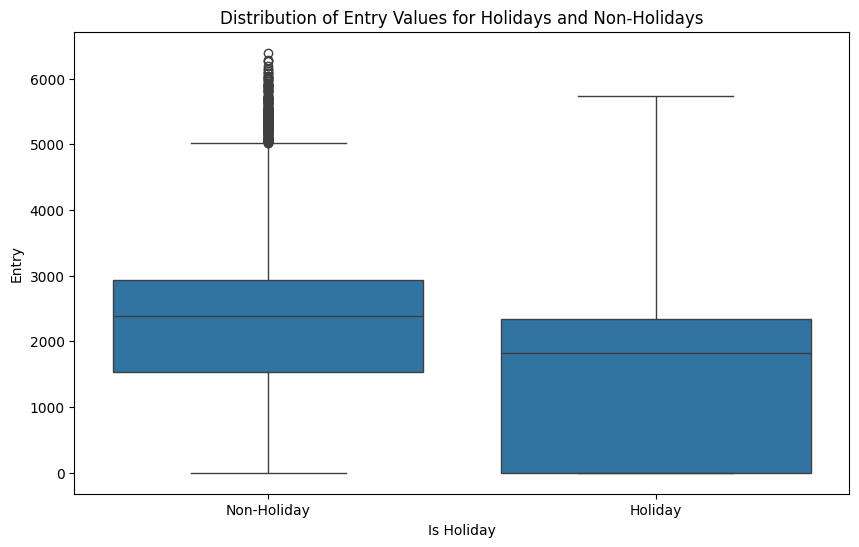

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot to visualize the distribution of Entry values for holidays and non-holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_holiday', y='Entry', data=df)
plt.title('Distribution of Entry Values for Holidays and Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Entry')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

In [31]:
from scipy.stats import ttest_ind

# Perform t-test
holiday_entries = df[df['is_holiday'] == 1]['Entry']
non_holiday_entries = df[df['is_holiday'] == 0]['Entry']

t_stat, p_value = ttest_ind(holiday_entries, non_holiday_entries, equal_var=False)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Entry values between holidays and non-holidays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Entry values between holidays and non-holidays.")

T-statistic: -17.451497265237712, P-value: 1.5462798461957515e-59
Reject the null hypothesis: There is a significant difference in Entry values between holidays and non-holidays.


In [32]:
# Calculate mean and standard deviation for each rain_class
rain_class_stats = df.groupby('rain_class')['Entry'].agg(['mean', 'std']).reset_index()
print(rain_class_stats)

   rain_class         mean          std
0           0  2062.548378  1252.170069
1           1  2100.657143  1239.472339
2           2  2280.686269  1239.995981
3           3  2271.139535  1240.704206
4           4  2251.490741  1204.662842
5           5  1112.050000   613.758265


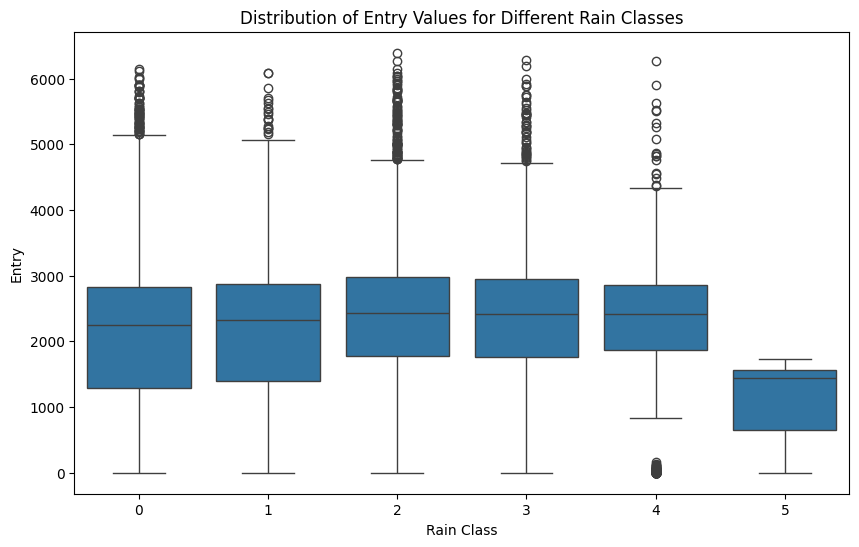

F-statistic: 22.47789062154619, P-value: 1.570337209573728e-22
Reject the null hypothesis: There is a significant difference in Entry values between different rain classes.


In [33]:
# Box plot to visualize the distribution of Entry values for different rain classes
plt.figure(figsize=(10, 6))
sns.boxplot(x='rain_class', y='Entry', data=df)
plt.title('Distribution of Entry Values for Different Rain Classes')
plt.xlabel('Rain Class')
plt.ylabel('Entry')
plt.show()

from scipy.stats import f_oneway

# Perform ANOVA
rain_class_groups = [df[df['rain_class'] == rc]['Entry'] for rc in df['rain_class'].unique()]
f_stat, p_value = f_oneway(*rain_class_groups)

print(f"F-statistic: {f_stat}, P-value: {p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in Entry values between different rain classes.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in Entry values between different rain classes.")

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------
     0      1    38.1088 0.8715   -58.5017  134.7192  False
     0      2   218.1379    0.0   146.6602  289.6156   True
     0      3   208.5912    0.0   112.8852  304.2971   True
     0      4   188.9424 0.0089     30.434  347.4508   True
     0      5  -950.4984 0.0085 -1744.3385 -156.6582   True
     1      2   180.0291    0.0    76.4159  283.6423   True
     1      3   170.4824 0.0009    48.8837  292.0811   True
     1      4   150.8336  0.139   -24.5276  326.1948  False
     1      5  -988.6071 0.0055 -1785.9833  -191.231   True
     2      3    -9.5467 0.9998   -112.317   93.2236  False
     2      4   -29.1955 0.9958  -192.0667  133.6757  False
     2      5 -1168.6363 0.0004  -1963.359 -373.9135   True
     3      4   -19.6488 0.9996  -194.5133  155.2157  False
     3      5 -1159.0895 0.0005 -1956.35

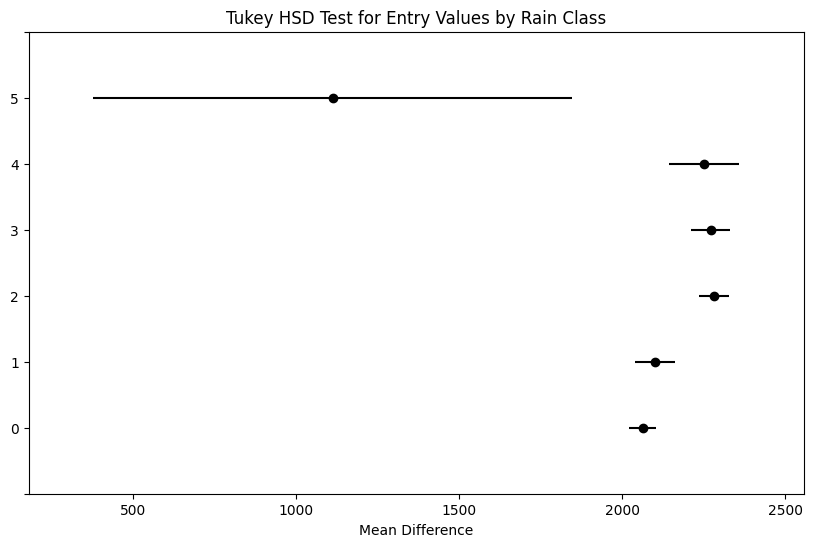

In [34]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey = pairwise_tukeyhsd(endog=df['Entry'], groups=df['rain_class'], alpha=0.05)
print(tukey)

# Plot the results
tukey.plot_simultaneous()
plt.title('Tukey HSD Test for Entry Values by Rain Class')
plt.xlabel('Mean Difference')
plt.show()

In [35]:
import shap

# Create a background dataset for SHAP using a larger sample from the training set
background = X[np.random.choice(X.shape[0], min(7000, X.shape[0]), replace=False)]

# Using SHAP GradientExplainer for lstm
explainer = shap.GradientExplainer(model, background)

# Compute SHAP values for the entire test dataset
shap_values = explainer.shap_values(X) #<-- entire dataset coz I can

# Check the shape of shap_values for debu
print("Original SHAP values shape:", shap_values.shape)

# Reshape the SHAP values to (n_samples, n_timesteps, n_features) 
shap_values_flat = shap_values.reshape(X.shape[0], 20, -1)
print("Reshaped SHAP values shape:", shap_values_flat.shape)

# Average across the time steps
shap_values_avg = np.mean(shap_values_flat, axis=1)  # Now the shape will be (n_samples, n_features)
print("Averaged SHAP values shape:", shap_values_avg.shape)

# Prepare set for plotting 
X_test_flat = X[:, -1, :-1] #Entry'
print("X_test_flat shape:", X_test_flat.shape)

# Ensure the number of features matches (we will take only the first 7 features for SHAP)
shap_values_avg = shap_values_avg[:, :-1]  # Exclude the last feature to match


c:\Users\inspiron-7460\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']



Original SHAP values shape: (14580, 20, 8, 1)
Reshaped SHAP values shape: (14580, 20, 8)
Averaged SHAP values shape: (14580, 8)
X_test_flat shape: (14580, 7)


In [36]:
# Check the shape of the input data
print("Shape of X_test:", X.shape)

# Check the shape of the SHAP values
print("Shape of shap_values_avg:", shap_values_avg.shape)

Shape of X_test: (14580, 20, 8)
Shape of shap_values_avg: (14580, 7)


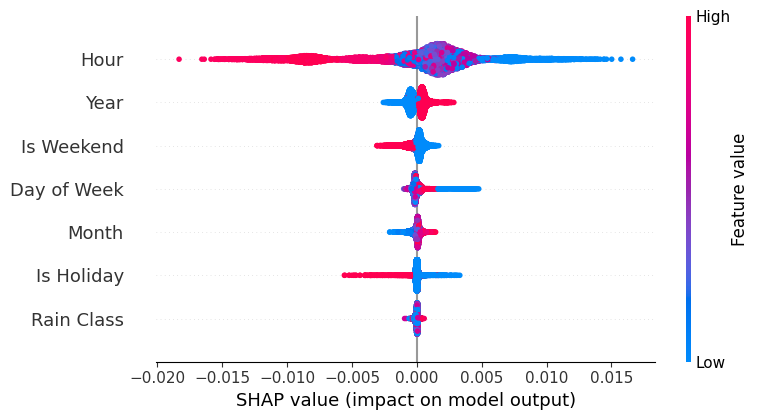

In [37]:
# Now the shapes should match
assert shap_values_avg.shape[1] == X_test_flat.shape[1], \
    f"SHAP values shape: {shap_values_avg.shape[1]}, X_test_flat shape: {X_test_flat.shape[1]}"

# Define feature names according to dataset/dataframe
feature_names = ['Hour', 'Day of Week', 'Is Weekend', 'Is Holiday', 'Month', 'Year', 'Rain Class']

# Plot the SHAP summary 
shap.summary_plot(shap_values_avg, X_test_flat, feature_names=feature_names)

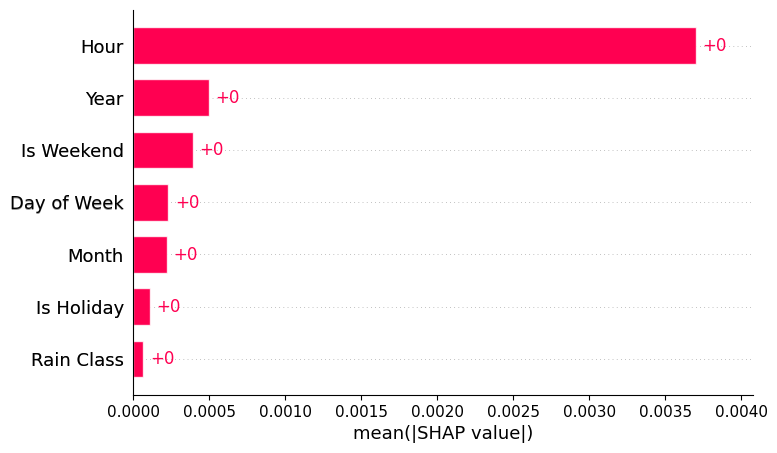

In [38]:
# Create an Explanation object
shap_explanation = shap.Explanation(values=shap_values_avg, feature_names=feature_names, data=X_test_flat)

# Plot the SHAP values
shap.plots.bar(shap_explanation)

c:\Users\inspiron-7460\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']



Averaged SHAP values shape for the instance: (8,)
Instance feature values shape: (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


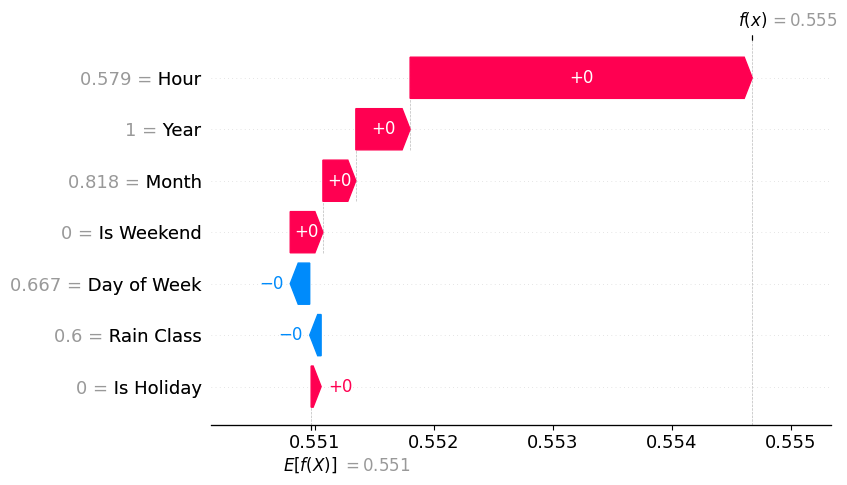

In [ ]:
# Select a specific instance from X_test
instance_index = 0  # Change this index to select different instances
instance = X_test[instance_index:instance_index + 1]

# Compute SHAP values for the specific instance
shap_values_instance = explainer.shap_values(instance)

# Reshape the SHAP values to (n_timesteps, n_features) for the selected instance
shap_values_instance_flat = shap_values_instance.reshape(instance.shape[1], -1)  # Adjust the shape as needed

# Average SHAP values across time steps (or you can pick one specific time step)
shap_values_instance_avg = np.mean(shap_values_instance_flat, axis=0)  # Averaging over time steps
print("Averaged SHAP values shape for the instance:", shap_values_instance_avg.shape)

# Prepare the corresponding feature values (excluding the 'Entry' target variable)
instance_features = instance[:, -1, :-1]  # Take the last time step and exclude 'Entry'
print("Instance feature values shape:", instance_features.shape)

# Define feature names according to your dataset (excluding 'Entry')
feature_names = ['Hour', 'Day of Week', 'Is Weekend', 'Is Holiday', 'Month', 'Year', 'Rain Class']

# Compute the model output for the selected instance
model_output = model.predict(instance)  # Get the model's predicted output for the instance

# Plot the SHAP waterfall plot for the specific instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance_avg[:len(feature_names)],  # Ensure the length matches feature names
                     base_values=model_output[0],  # Use the model's output as the base value
                     data=instance_features[0],  # Feature values for this instance
                     feature_names=feature_names)
)

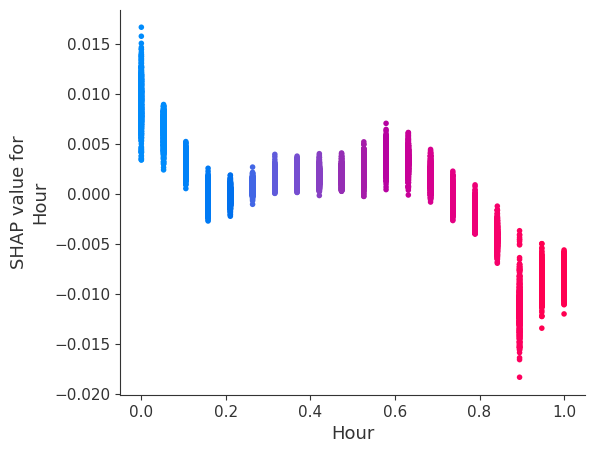

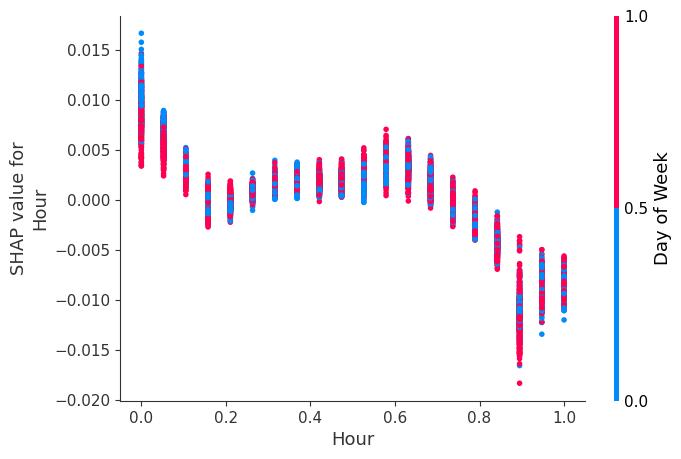

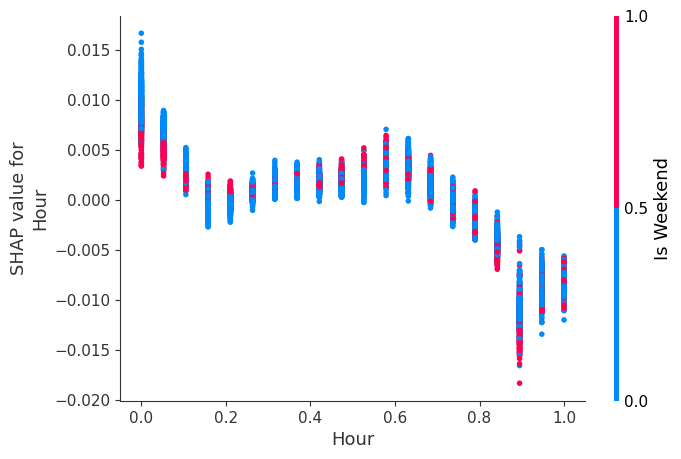

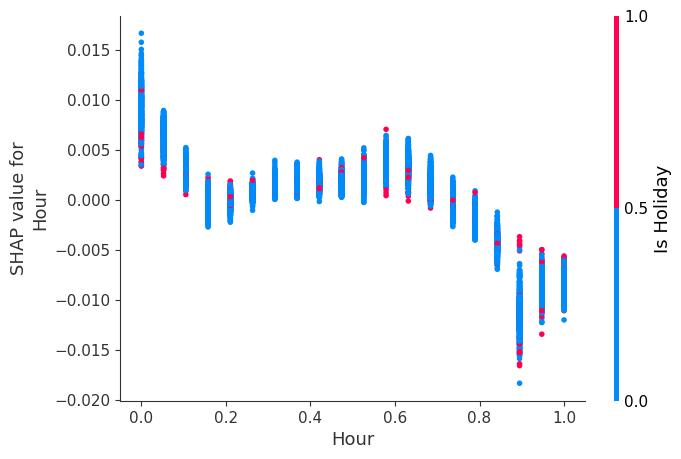

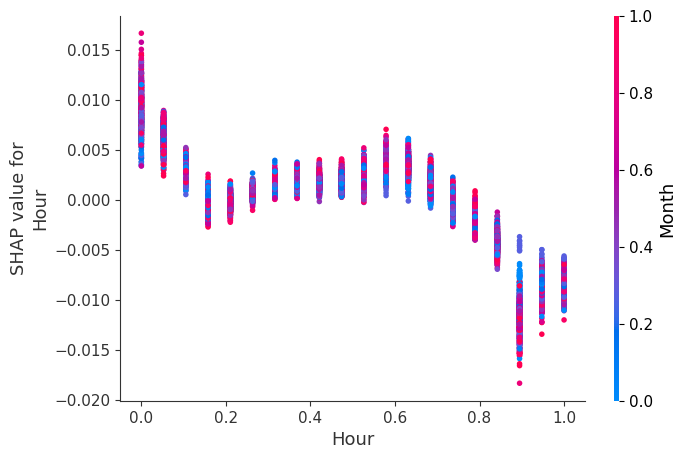

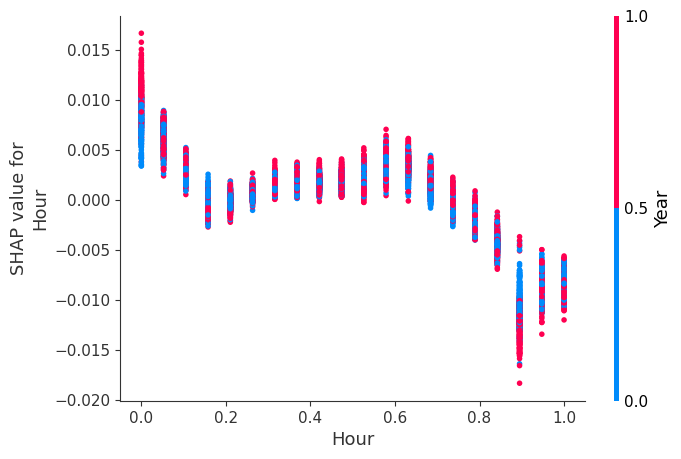

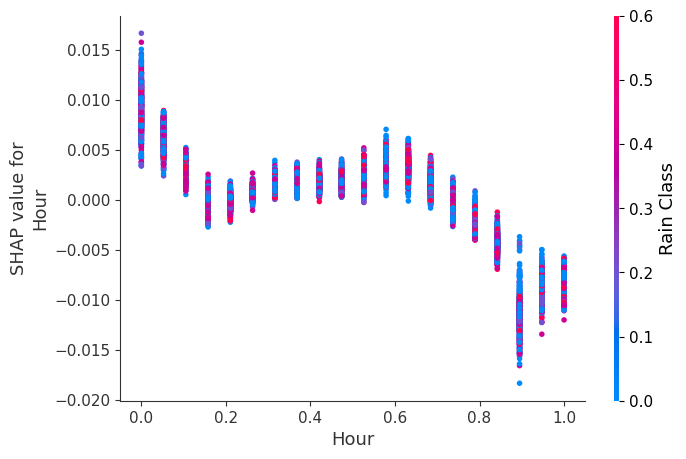

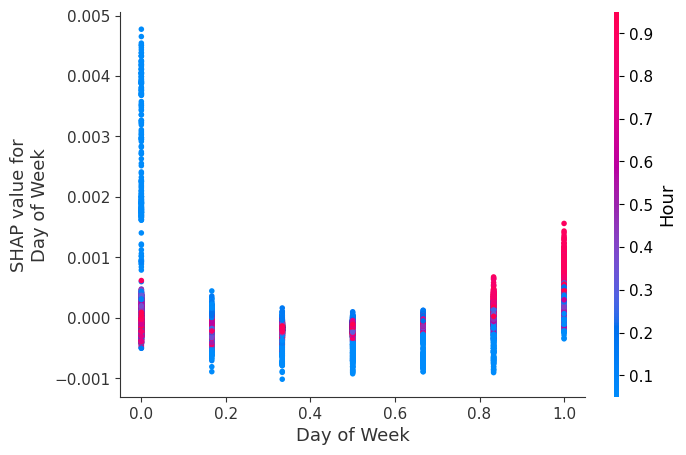

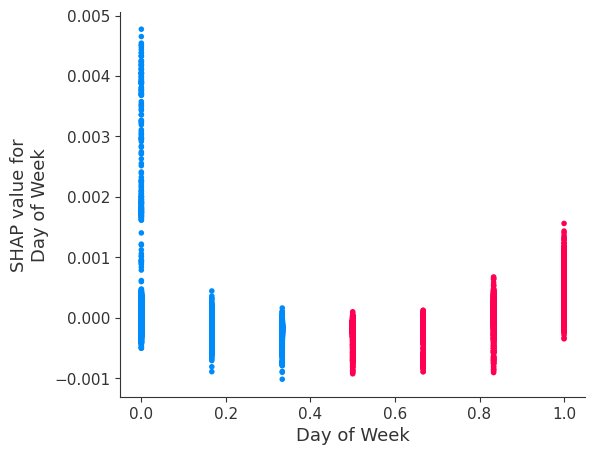

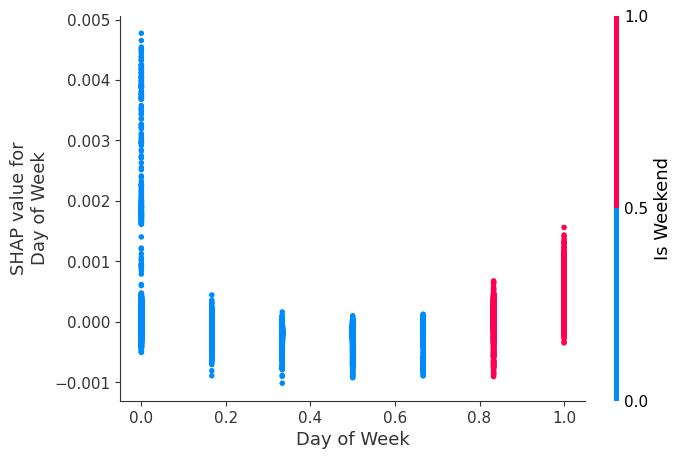

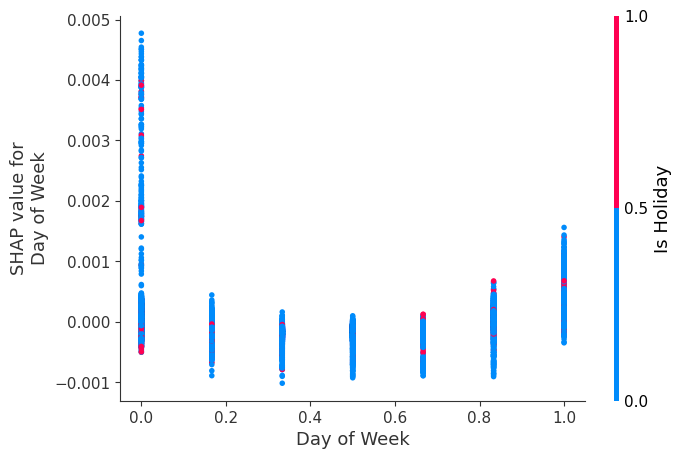

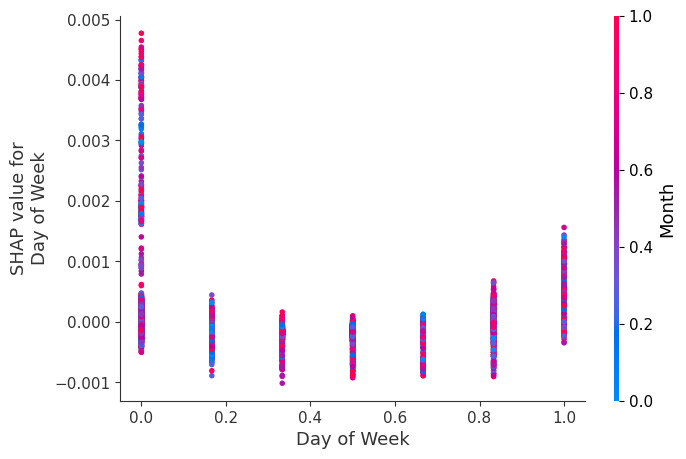

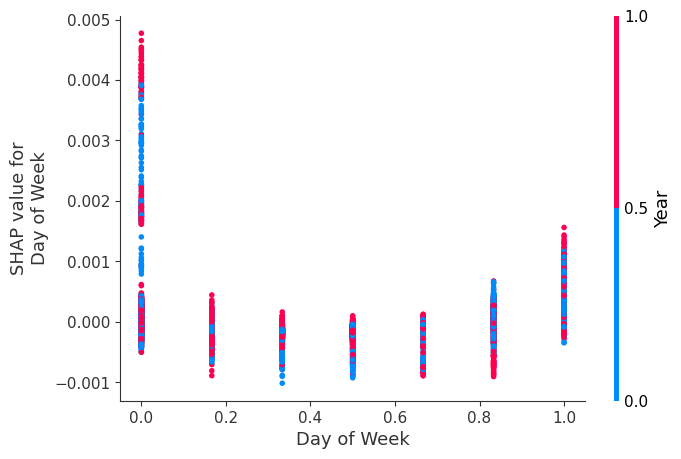

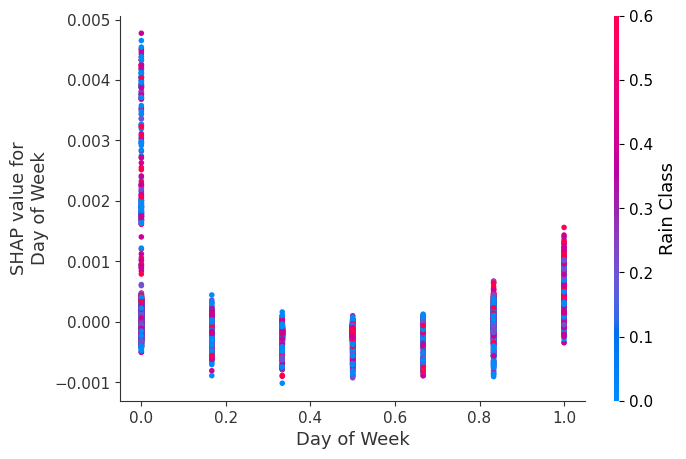

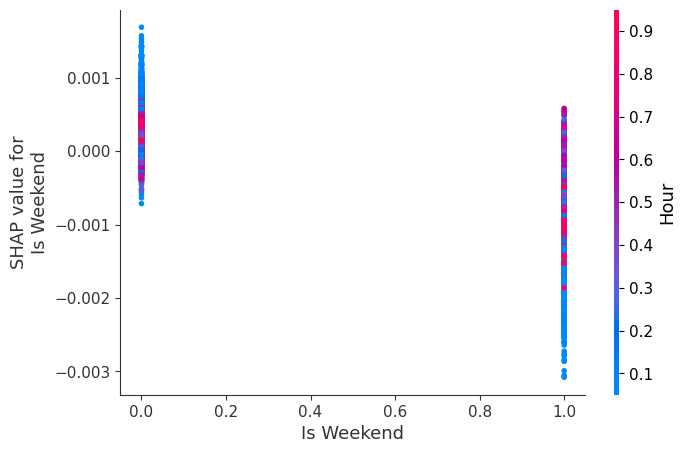

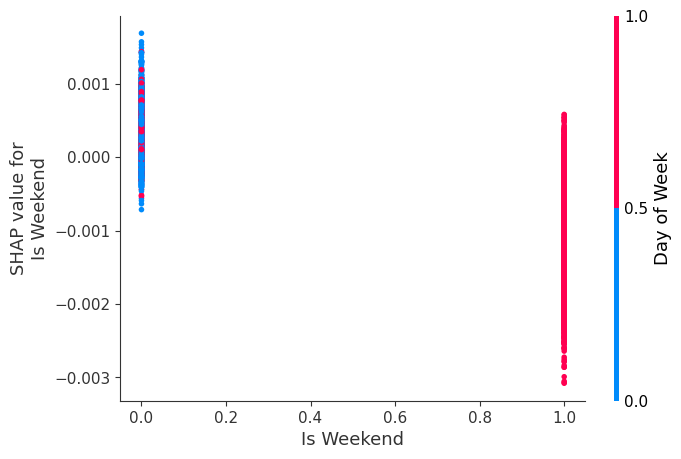

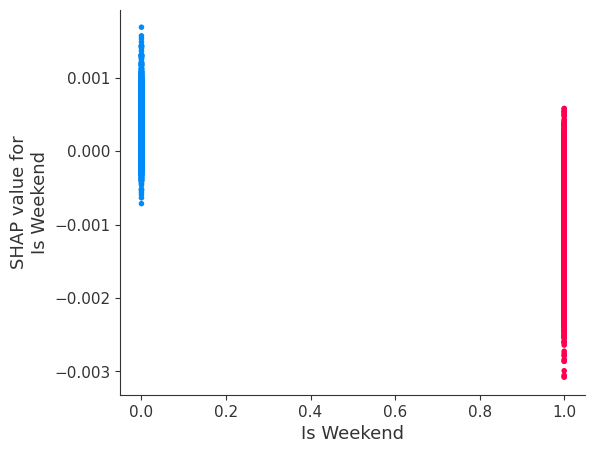

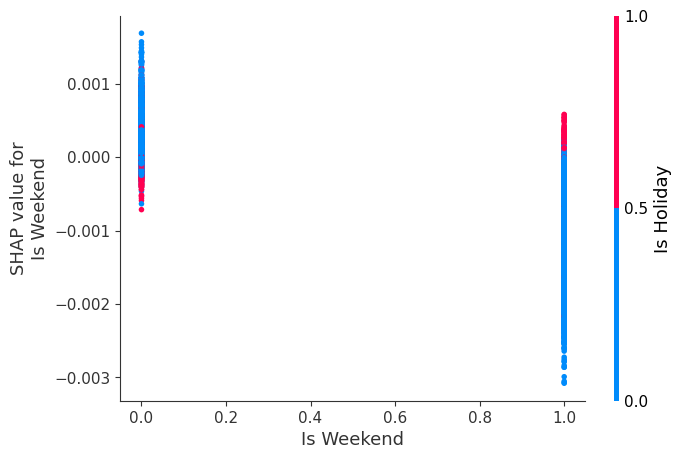

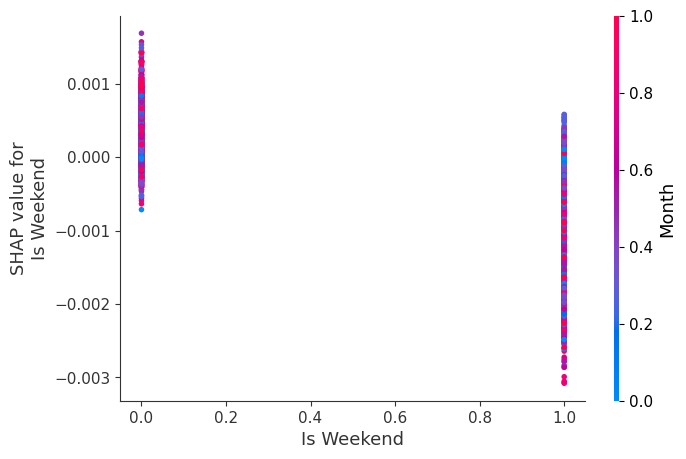

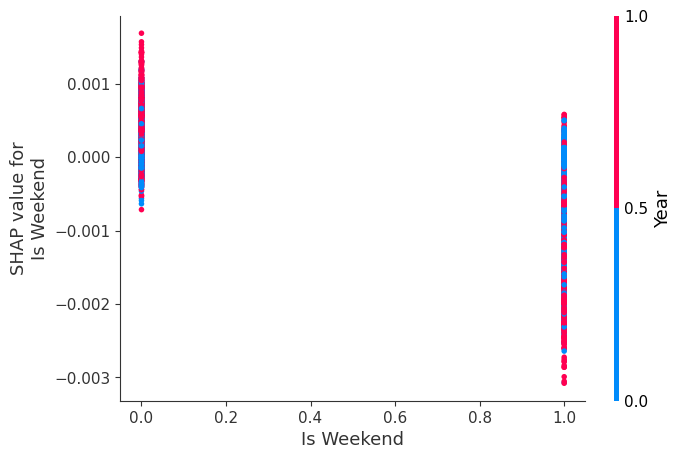

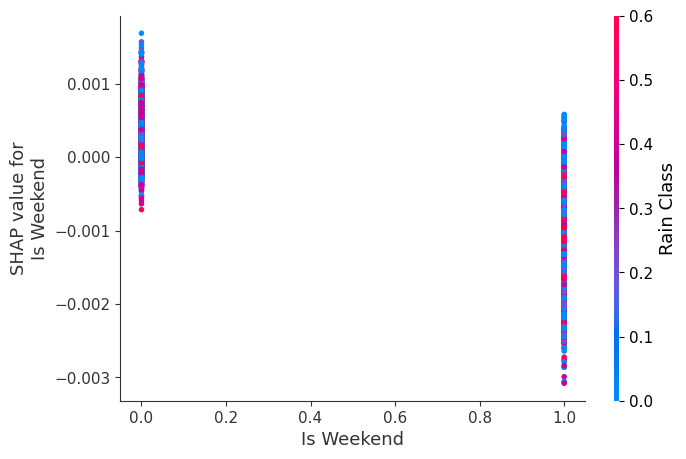

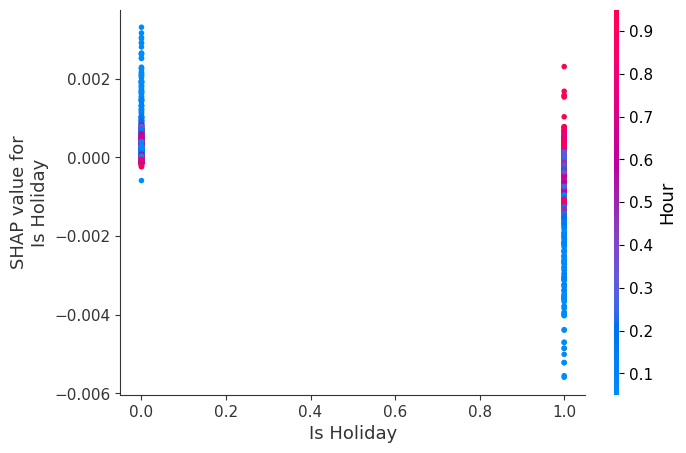

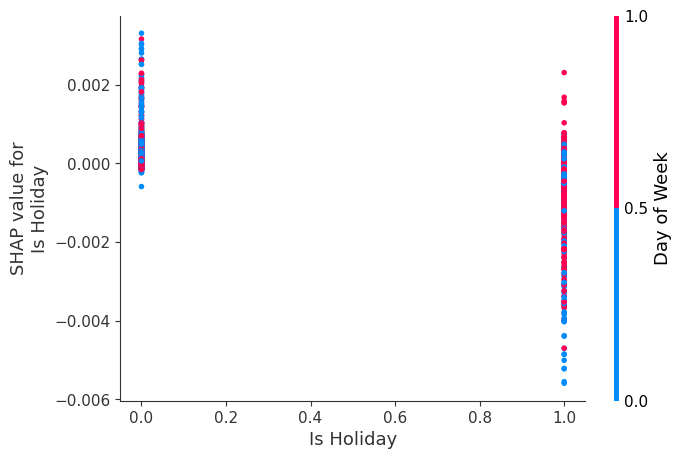

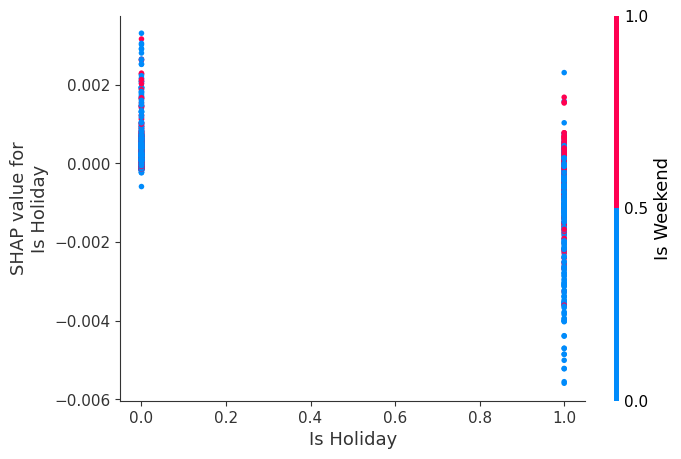

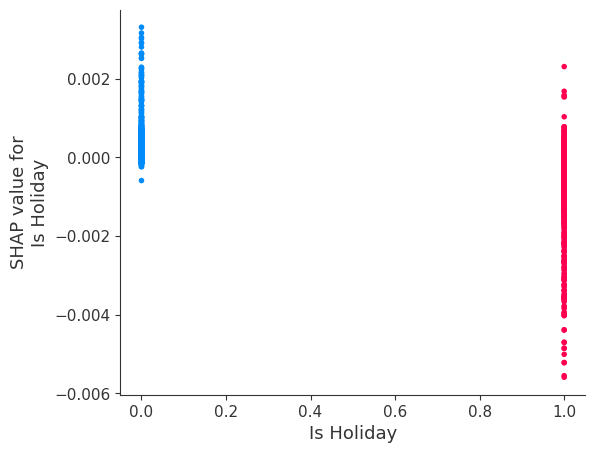

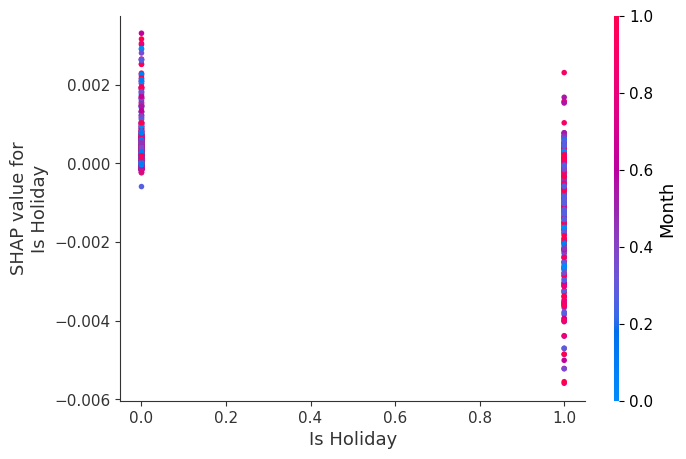

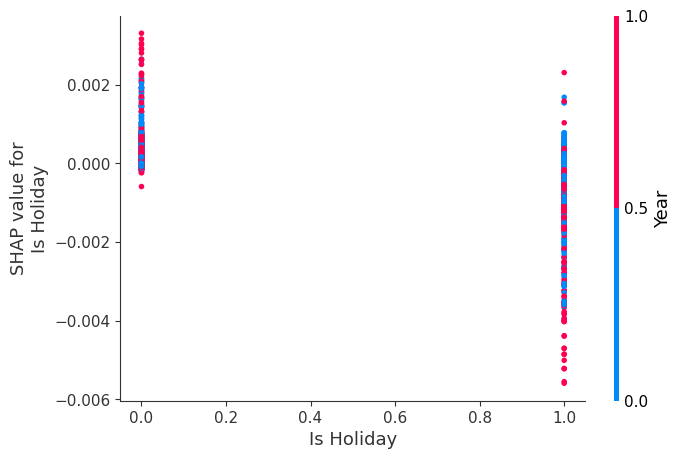

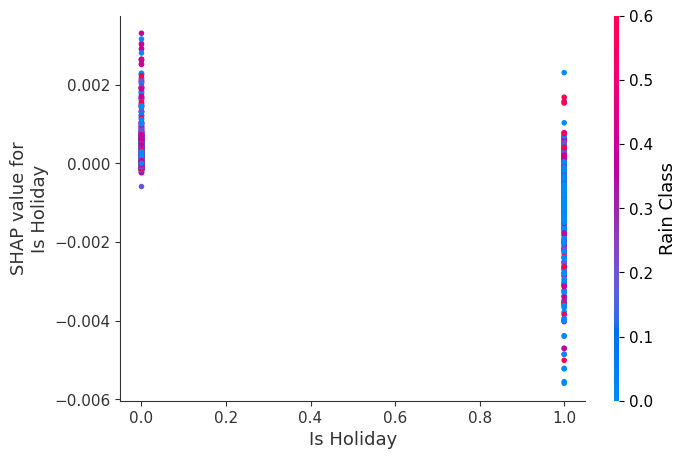

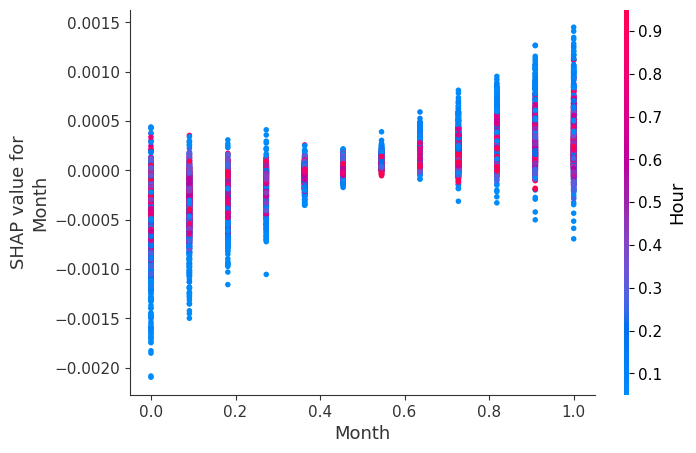

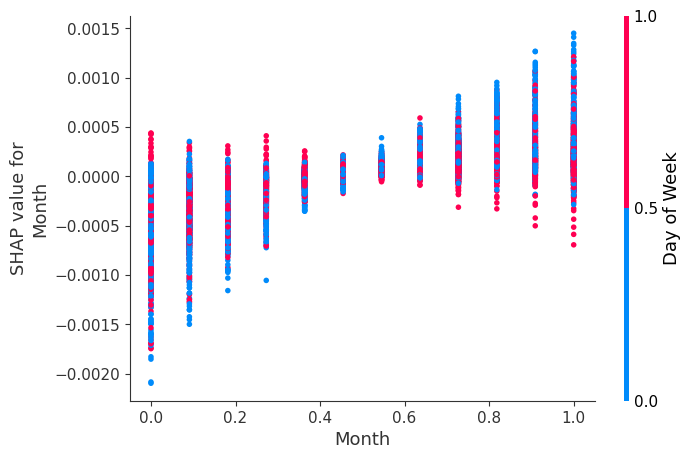

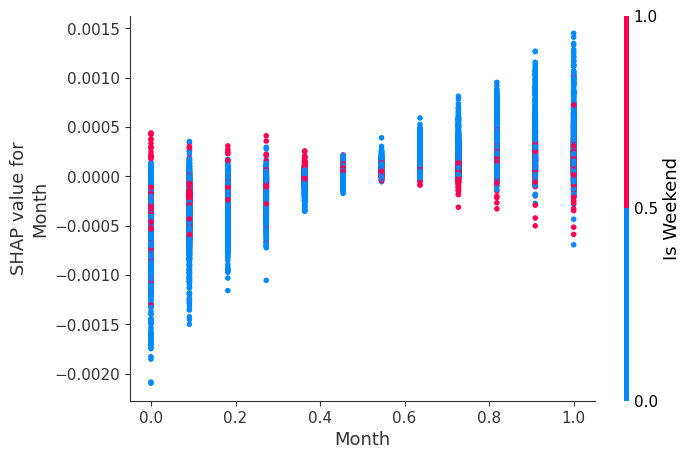

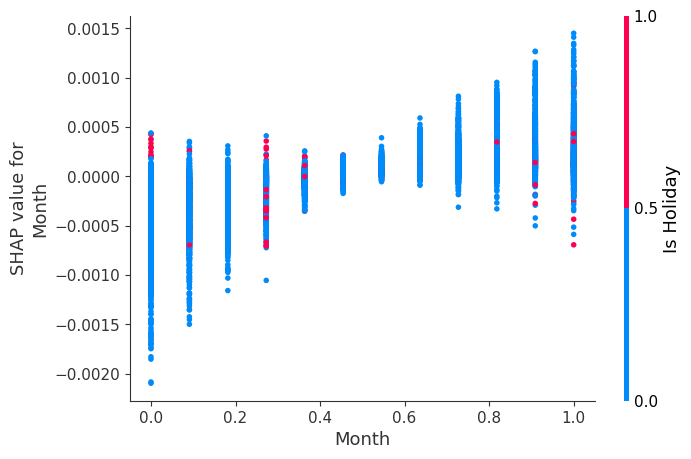

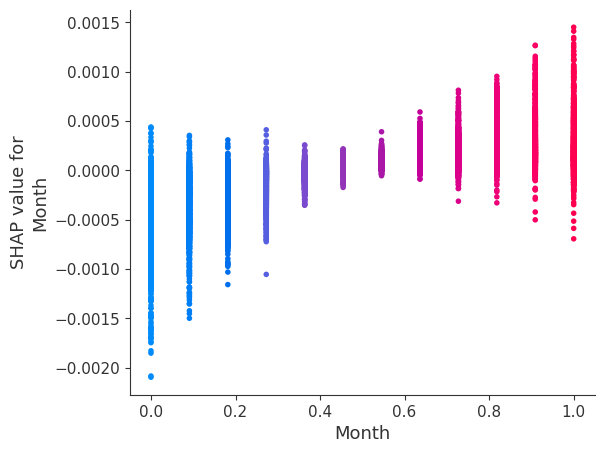

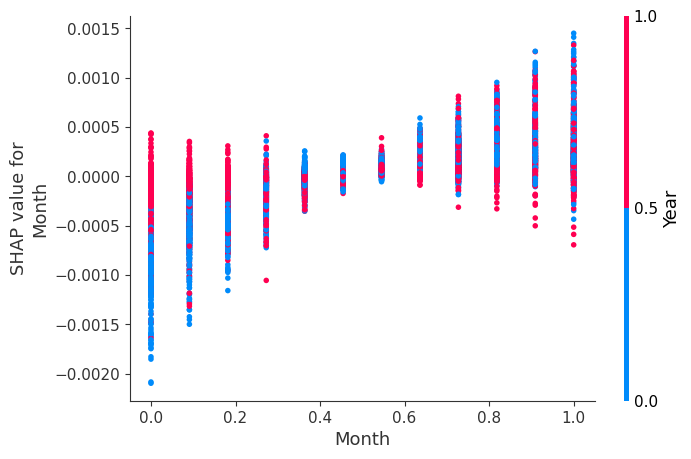

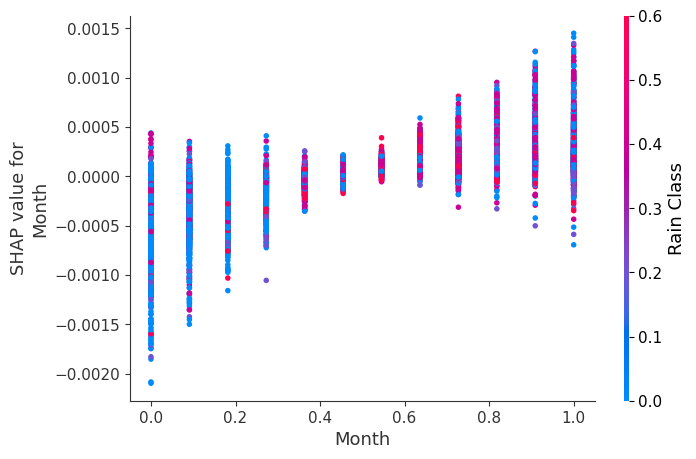

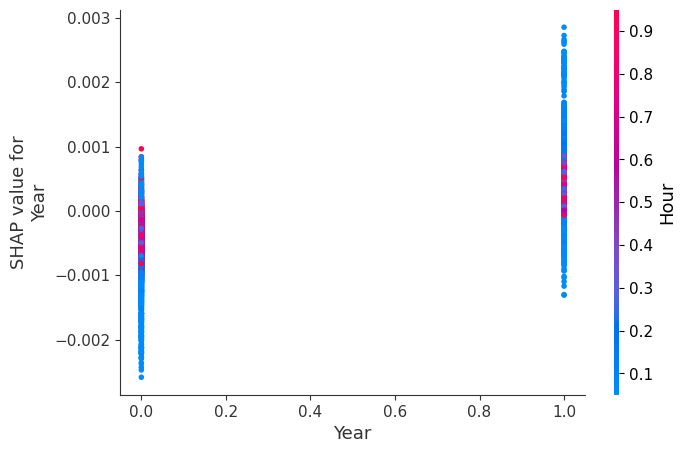

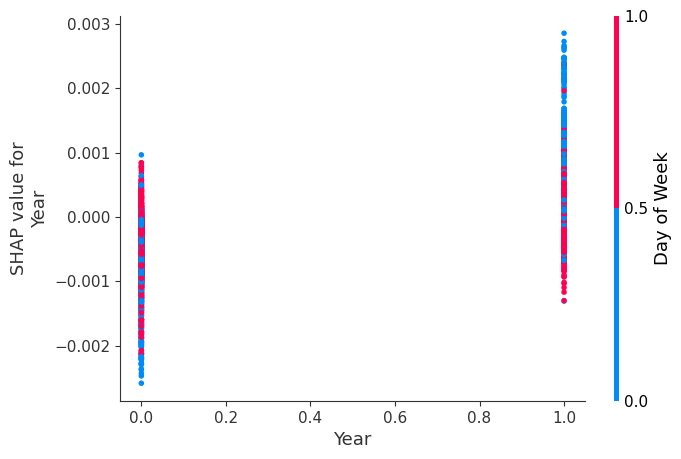

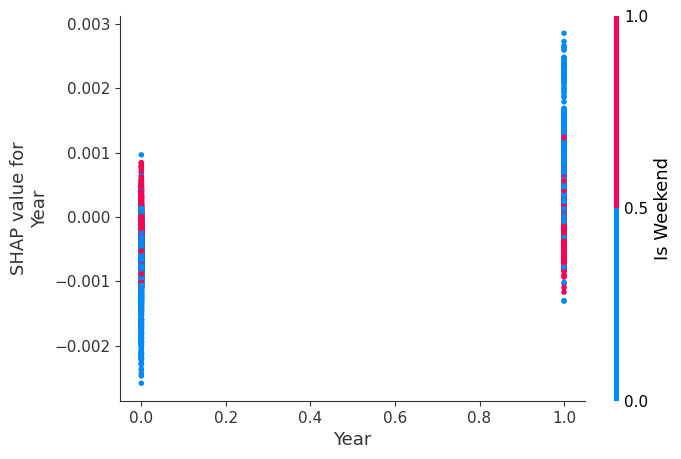

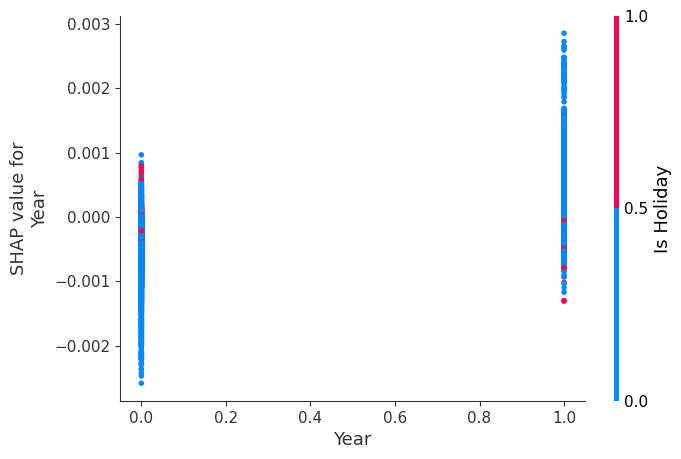

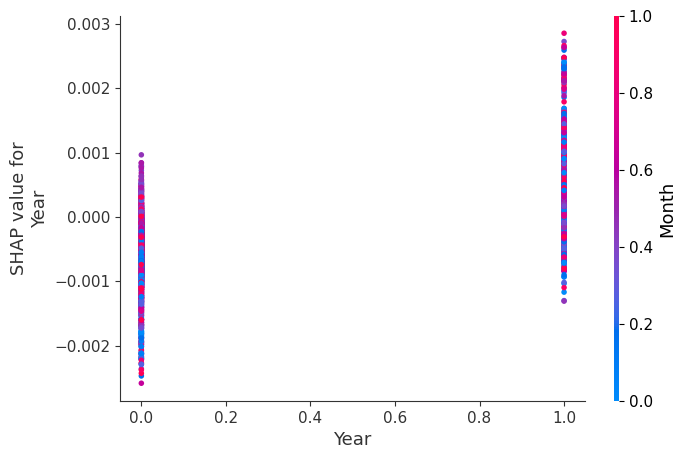

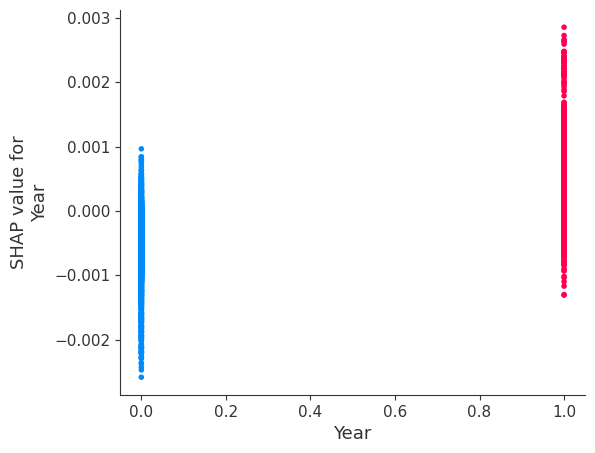

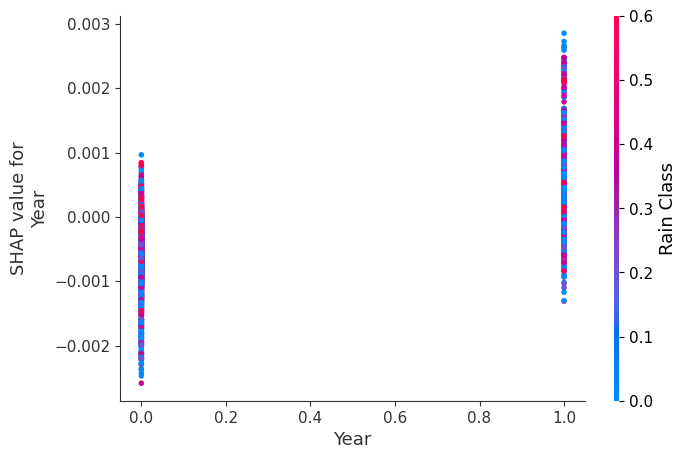

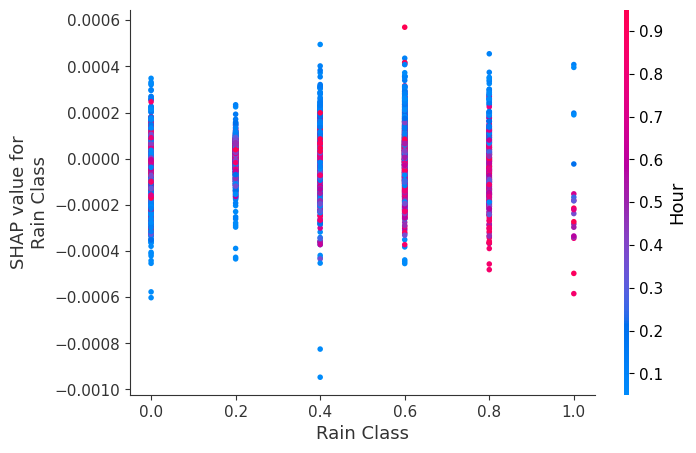

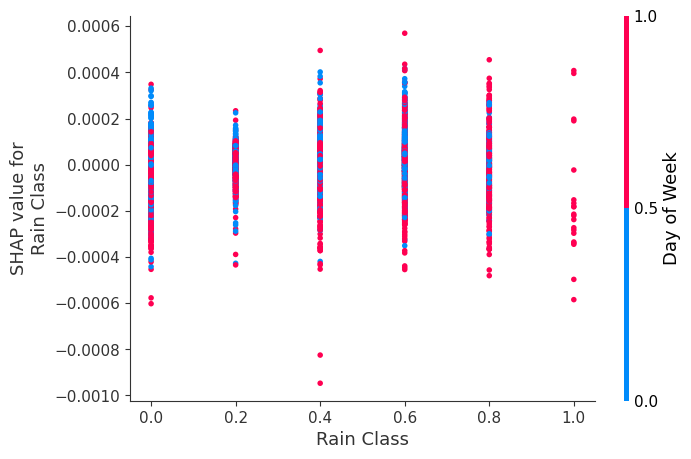

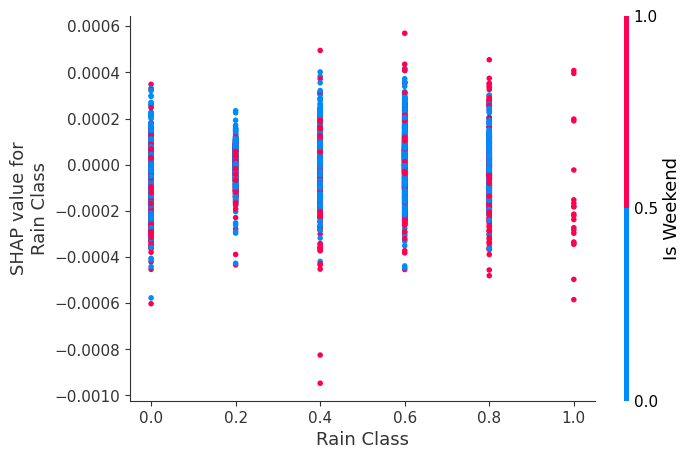

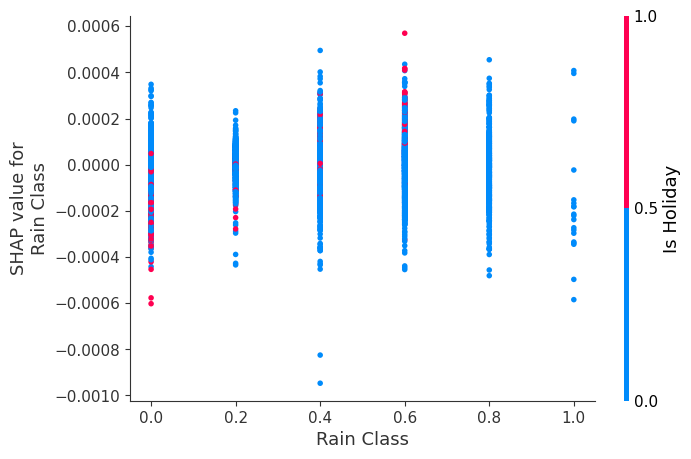

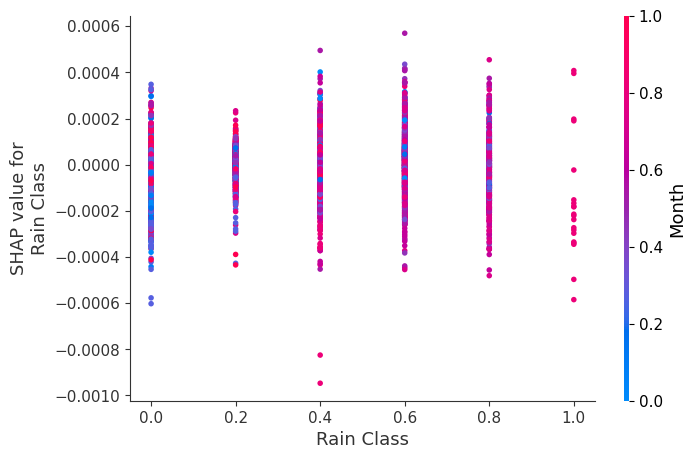

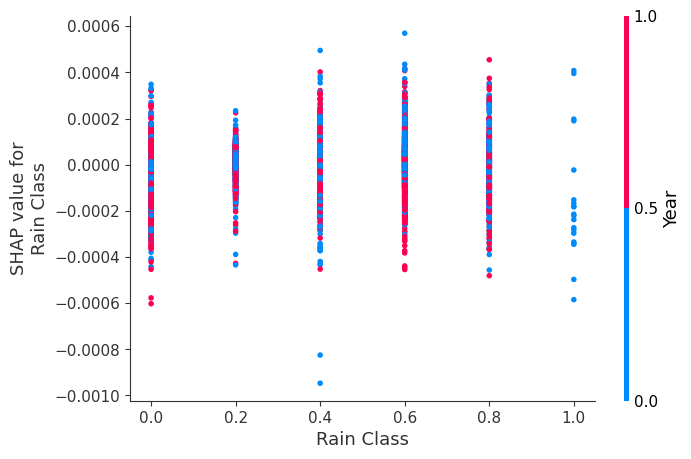

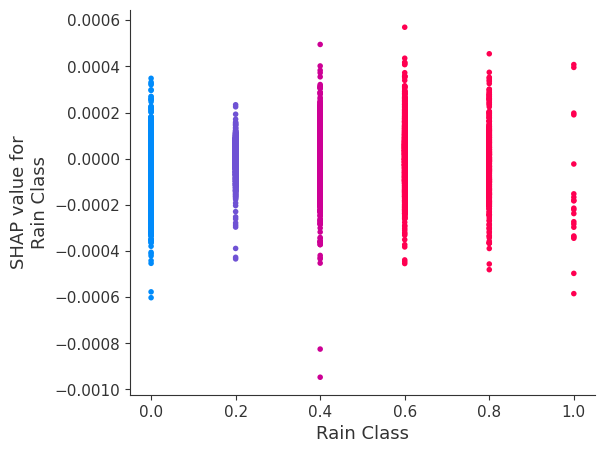

In [40]:
# 2. Plot SHAP Dependence Plot for the first feature (Hour)
for i in range(7):
    for j in range(7):
        shap.dependence_plot(i, shap_values_avg, X_test_flat, feature_names=feature_names, interaction_index=j)

219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step


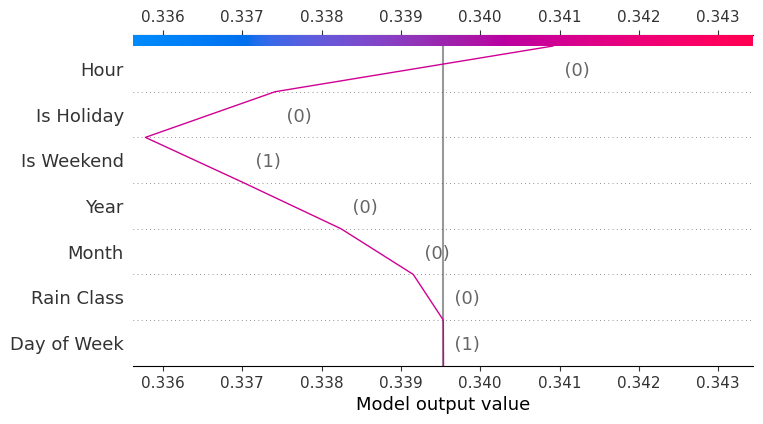

In [41]:
# Calculate the expected value for the model
expected_value = np.mean(model.predict(background))
#SHAP Decision Plot for the first instance (January 2, 2022 04:00:00)
data_index = 1
shap.decision_plot(expected_value, shap_values_avg[data_index], X_test_flat[data_index], feature_names=feature_names)

SHAP Decision Plot for hour 3


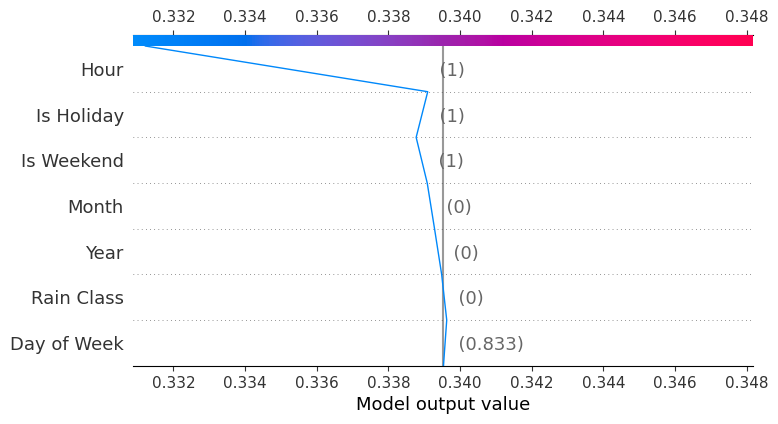

SHAP Decision Plot for hour 4


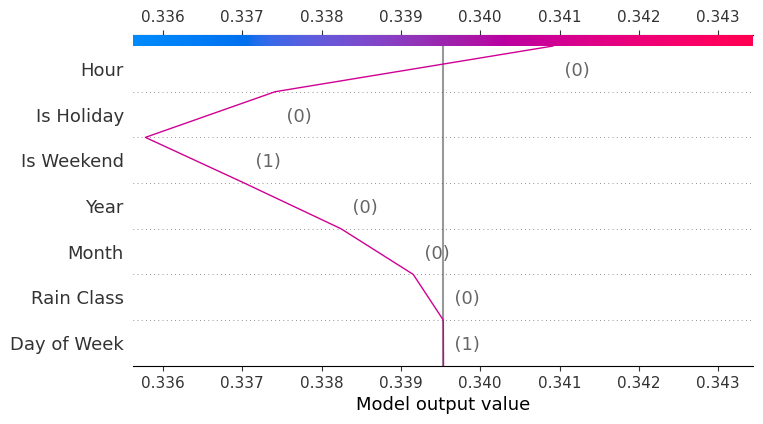

SHAP Decision Plot for hour 5


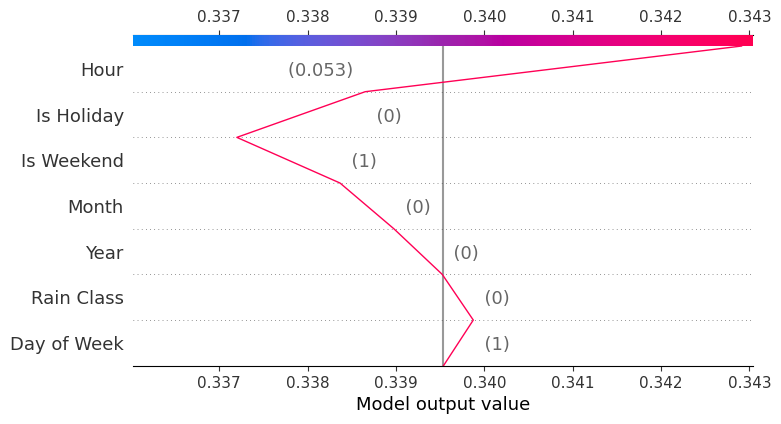

SHAP Decision Plot for hour 6


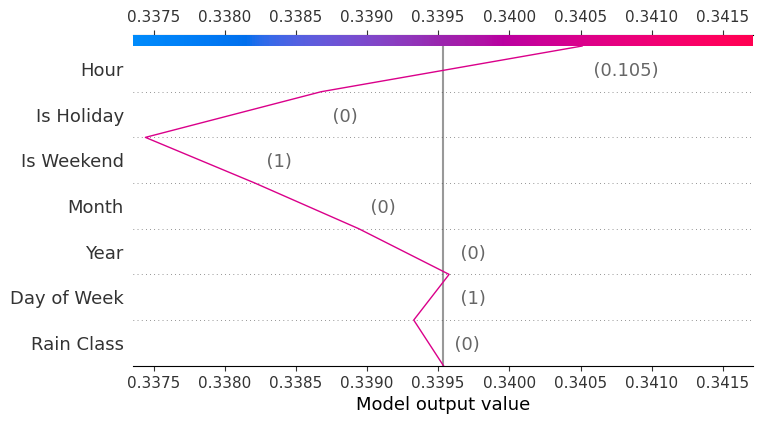

SHAP Decision Plot for hour 7


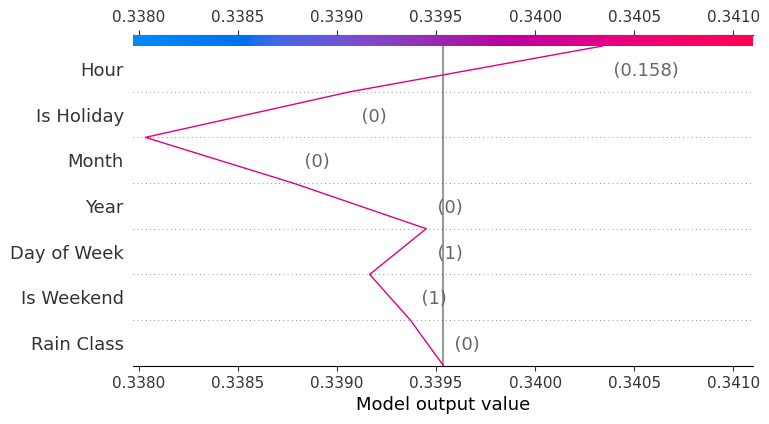

SHAP Decision Plot for hour 8


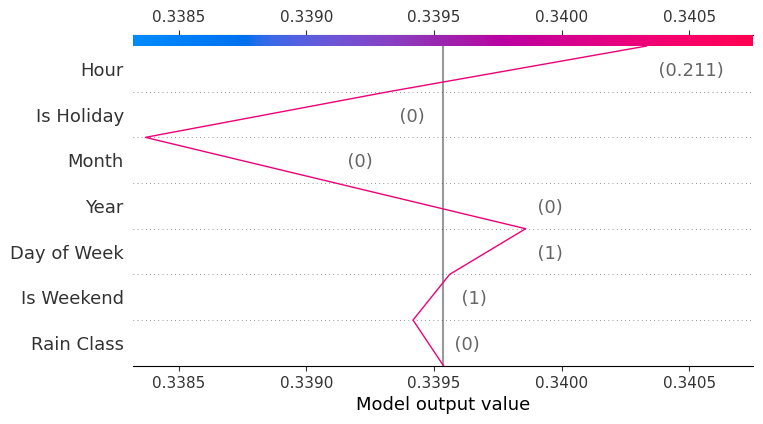

SHAP Decision Plot for hour 9


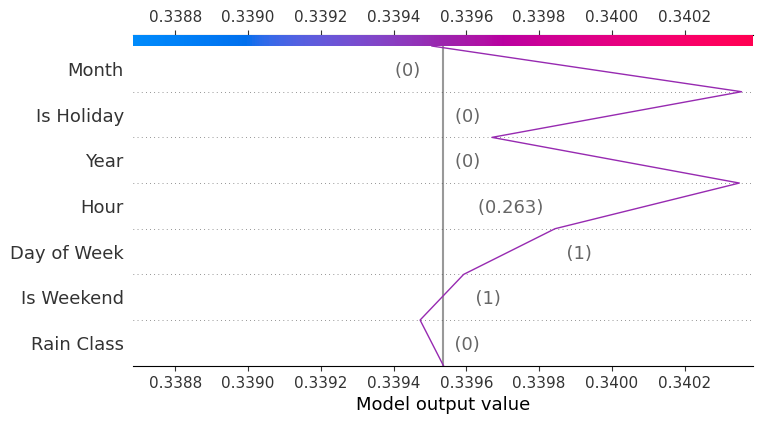

SHAP Decision Plot for hour 10


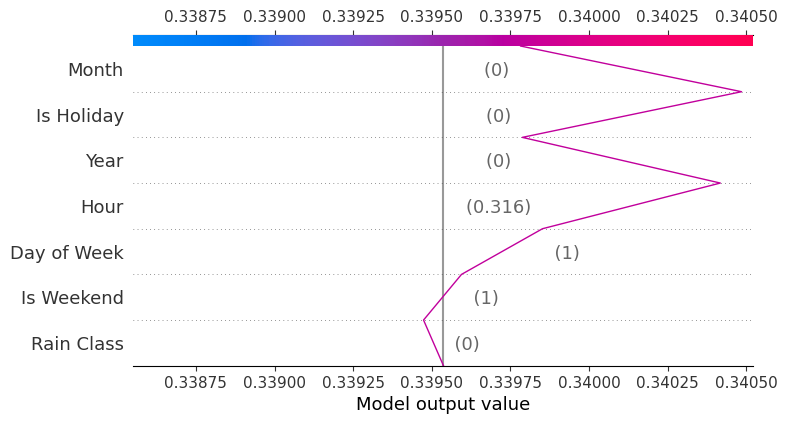

SHAP Decision Plot for hour 11


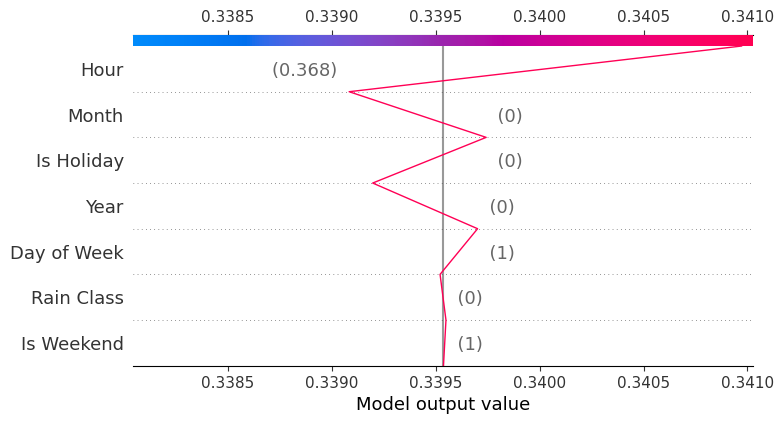

SHAP Decision Plot for hour 12


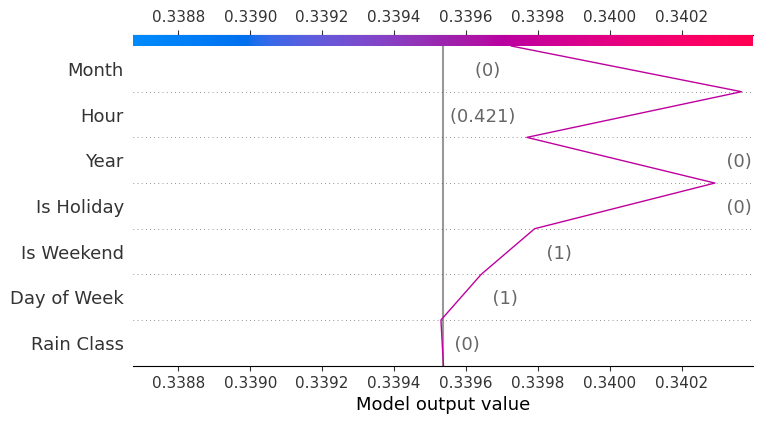

SHAP Decision Plot for hour 13


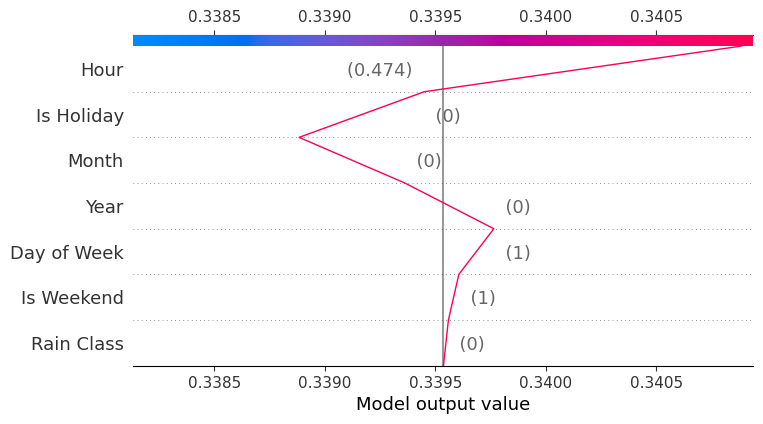

SHAP Decision Plot for hour 14


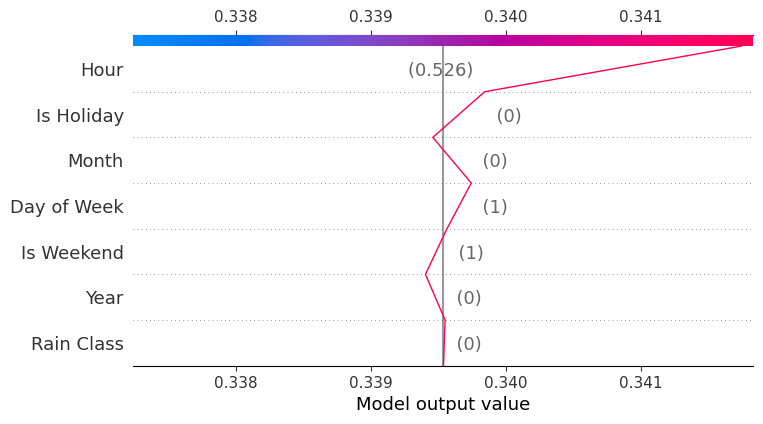

SHAP Decision Plot for hour 15


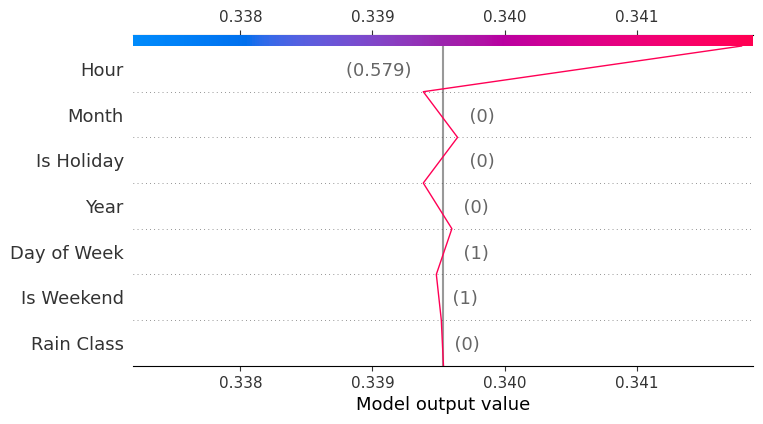

SHAP Decision Plot for hour 16


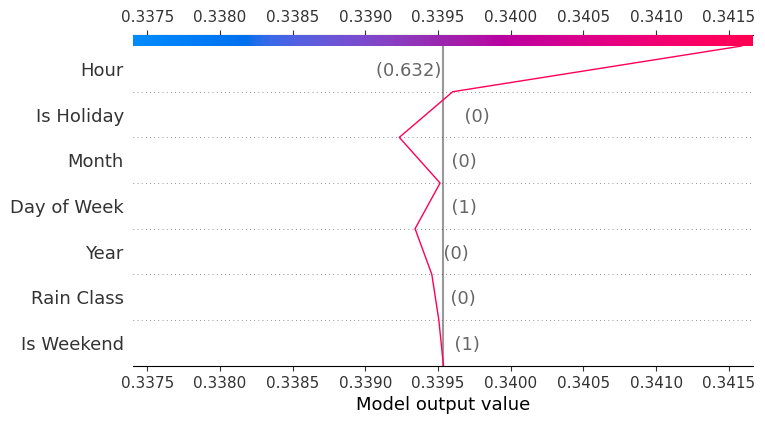

SHAP Decision Plot for hour 17


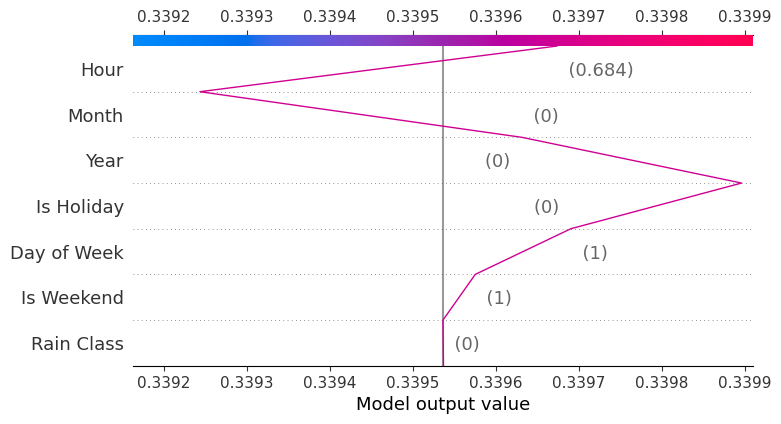

SHAP Decision Plot for hour 18


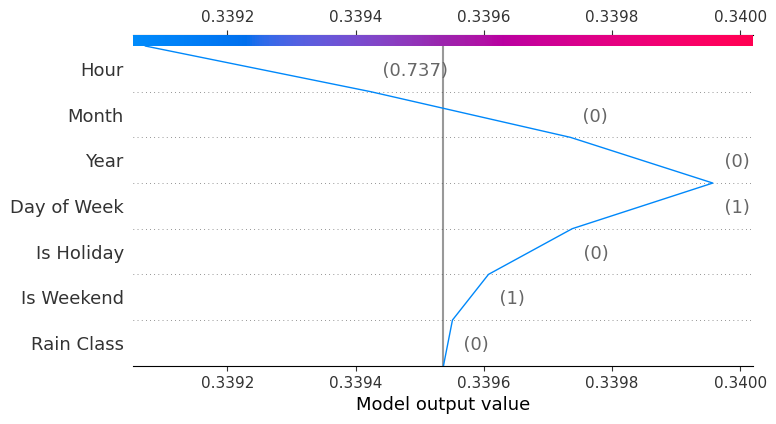

SHAP Decision Plot for hour 19


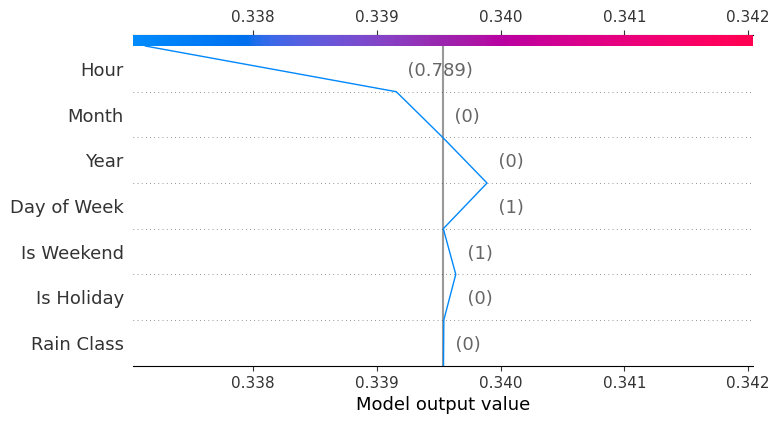

SHAP Decision Plot for hour 20


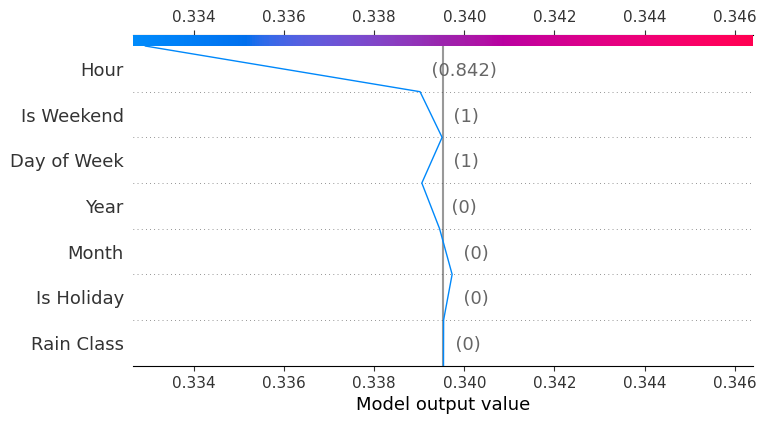

SHAP Decision Plot for hour 21


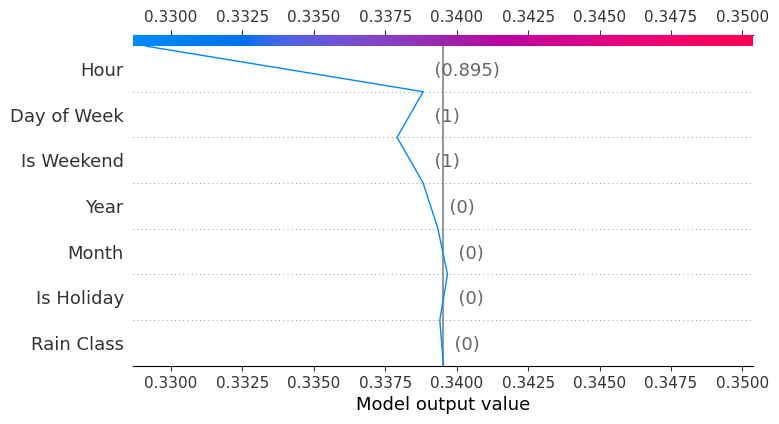

SHAP Decision Plot for hour 22


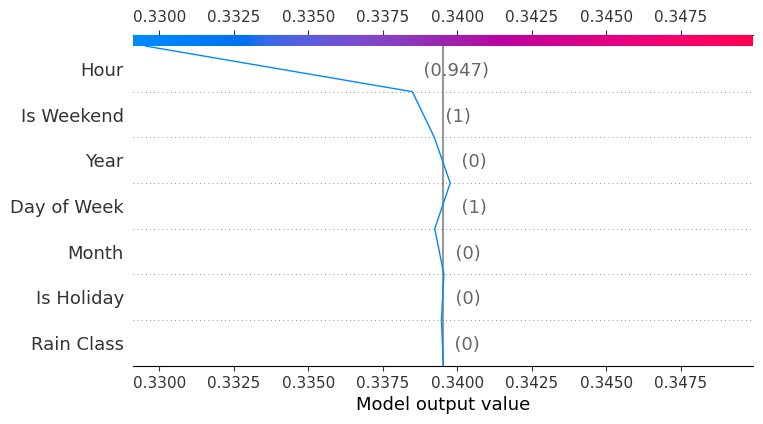

SHAP Decision Plot for hour 23


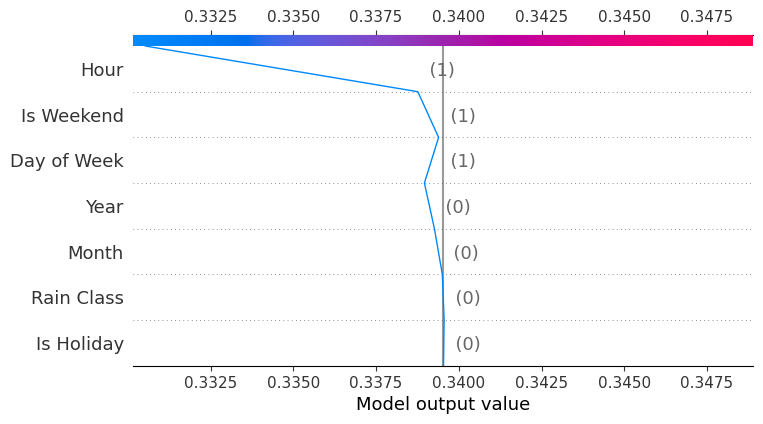

In [42]:
for i in range(21):
    print(f"SHAP Decision Plot for hour {3+i}")
    shap.decision_plot(expected_value, shap_values_avg[i], X_test_flat[i], feature_names=feature_names)

SHAP Decision Plot for index 7281 hour 4


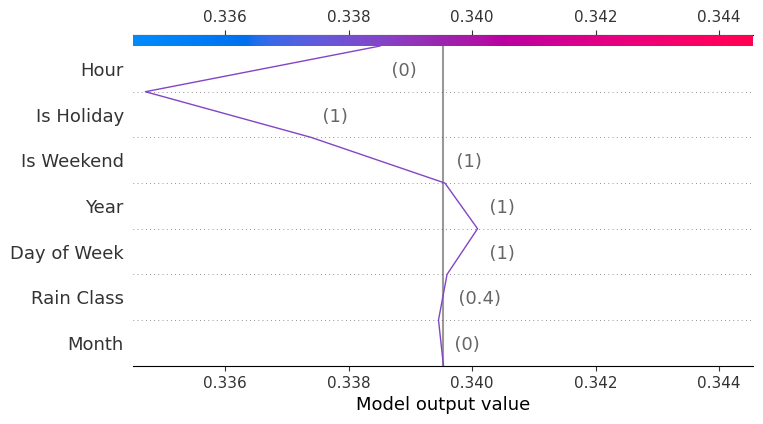

SHAP Decision Plot for index 7282 hour 5


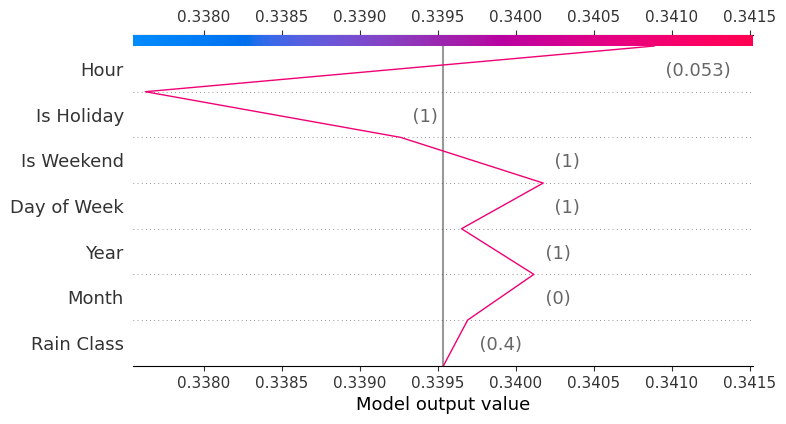

SHAP Decision Plot for index 7283 hour 6


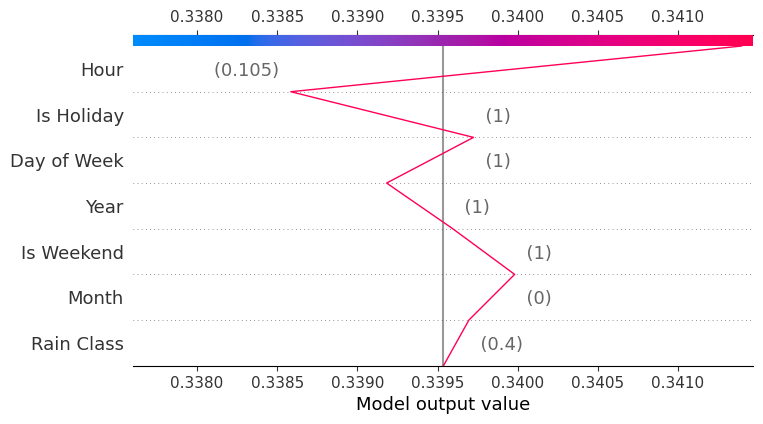

SHAP Decision Plot for index 7284 hour 7


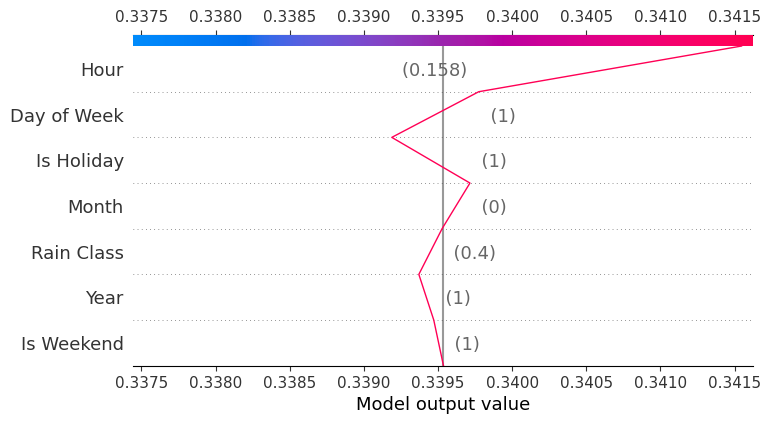

SHAP Decision Plot for index 7285 hour 8


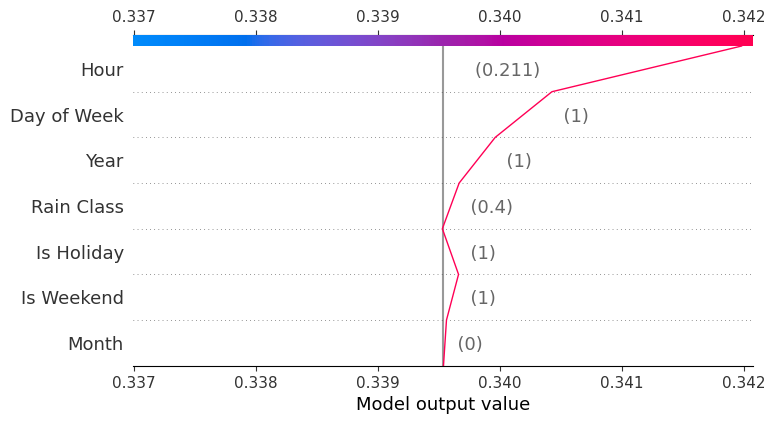

SHAP Decision Plot for index 7286 hour 9


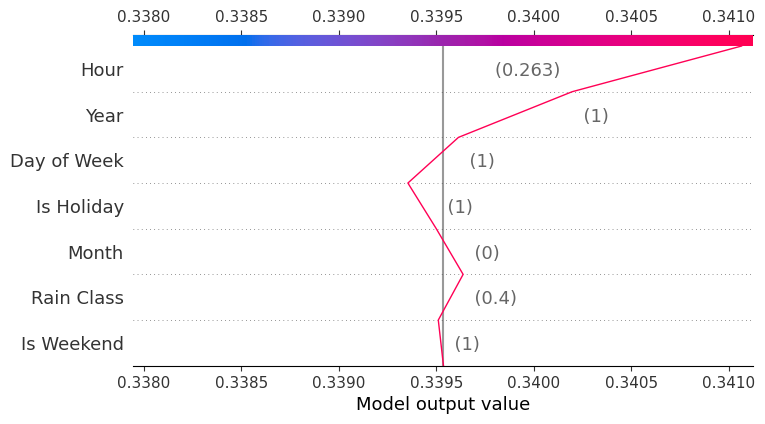

SHAP Decision Plot for index 7287 hour 10


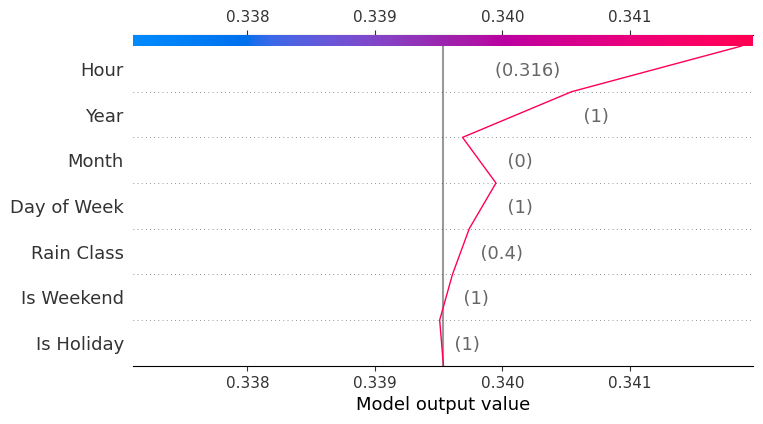

SHAP Decision Plot for index 7288 hour 11


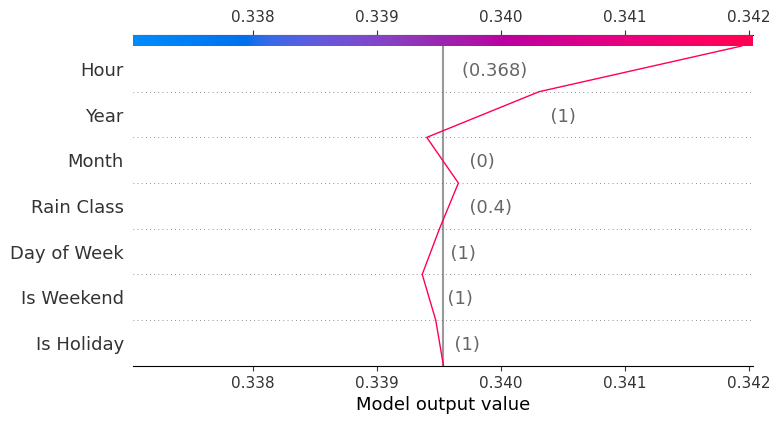

SHAP Decision Plot for index 7289 hour 12


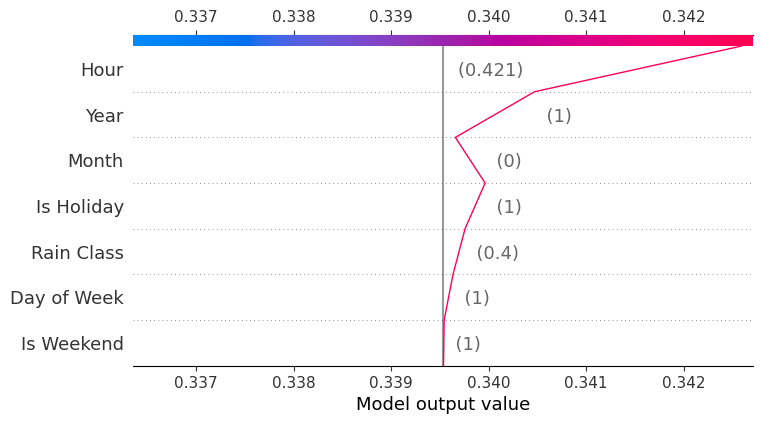

SHAP Decision Plot for index 7290 hour 13


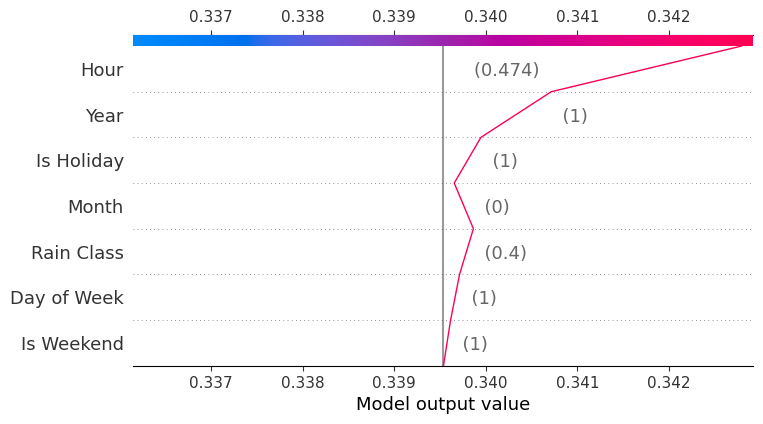

SHAP Decision Plot for index 7291 hour 14


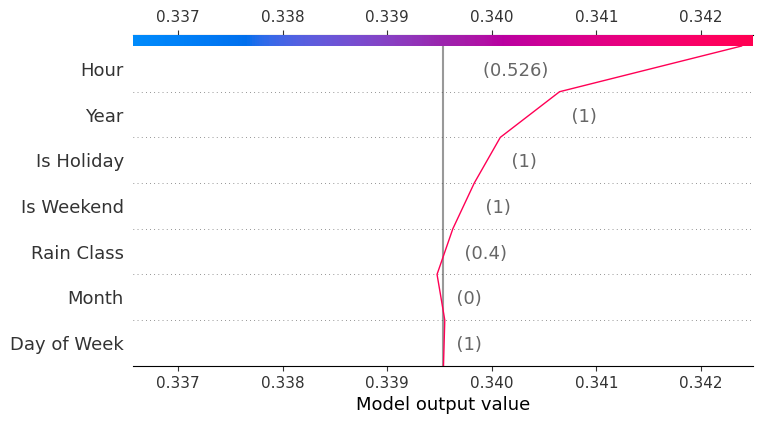

SHAP Decision Plot for index 7292 hour 15


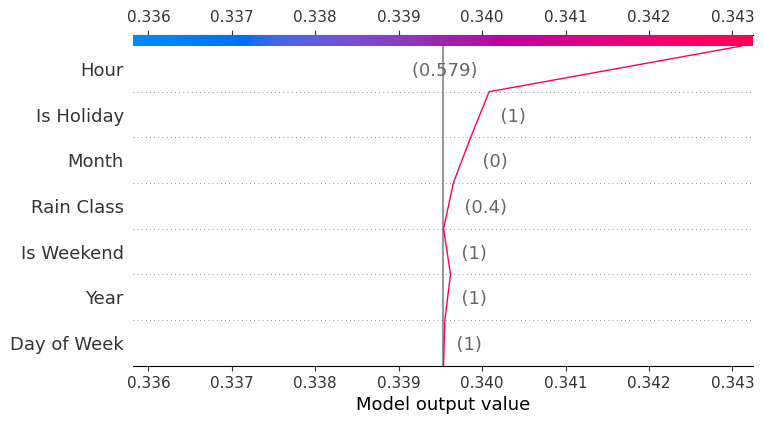

SHAP Decision Plot for index 7293 hour 16


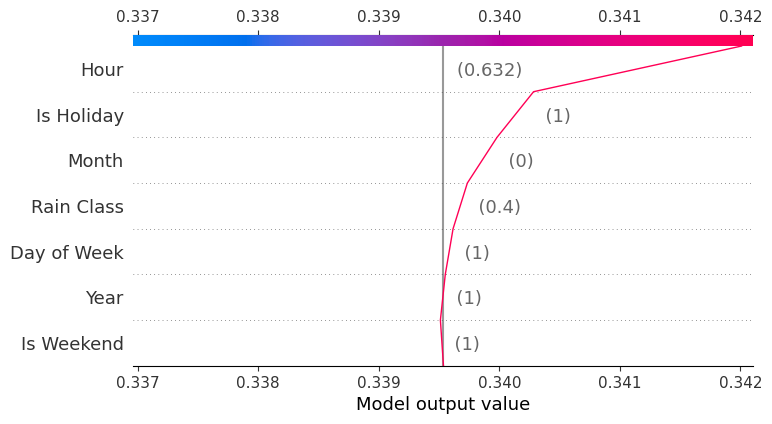

SHAP Decision Plot for index 7294 hour 17


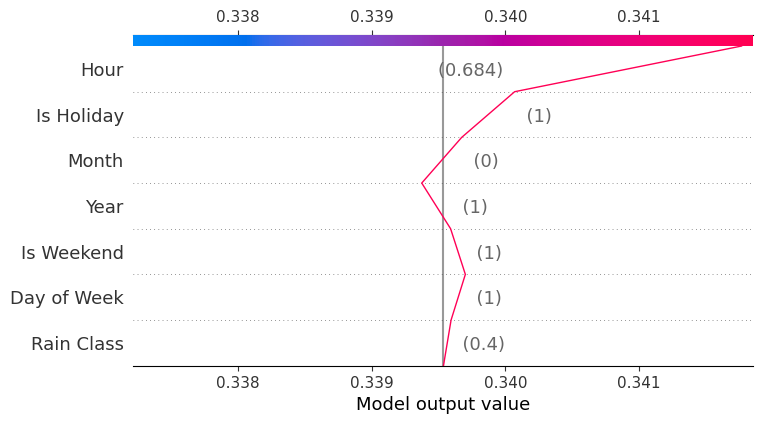

SHAP Decision Plot for index 7295 hour 18


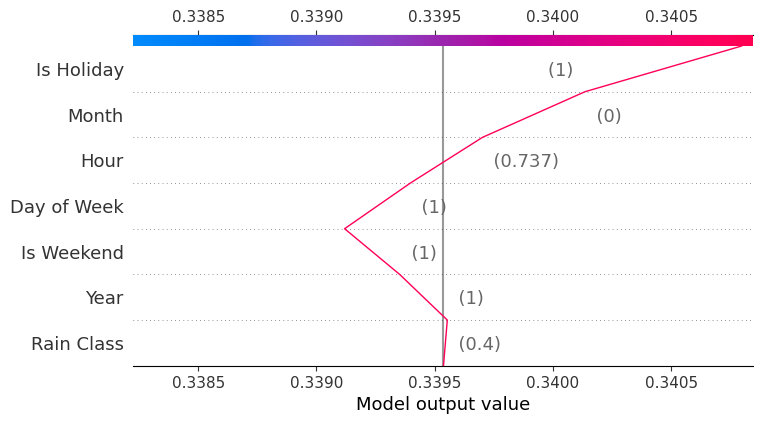

SHAP Decision Plot for index 7296 hour 19


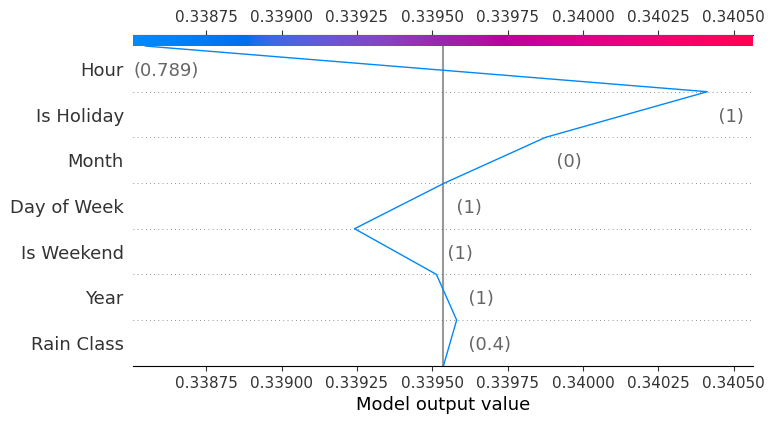

SHAP Decision Plot for index 7297 hour 20


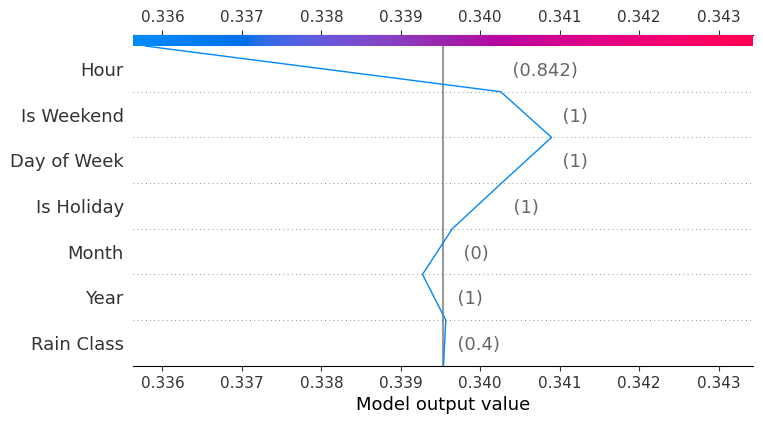

SHAP Decision Plot for index 7298 hour 21


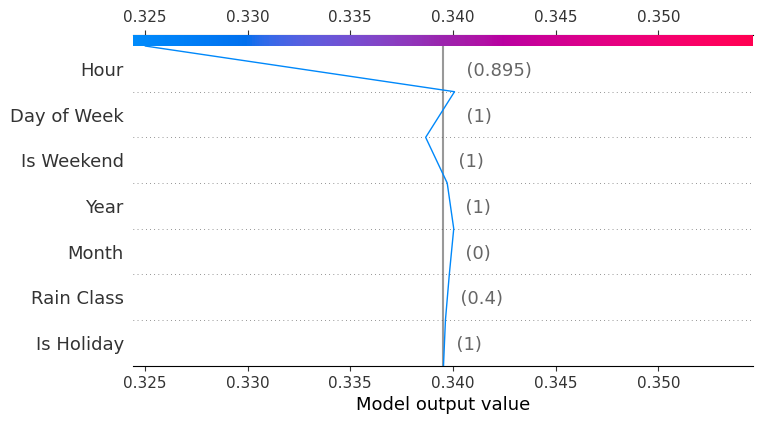

SHAP Decision Plot for index 7299 hour 22


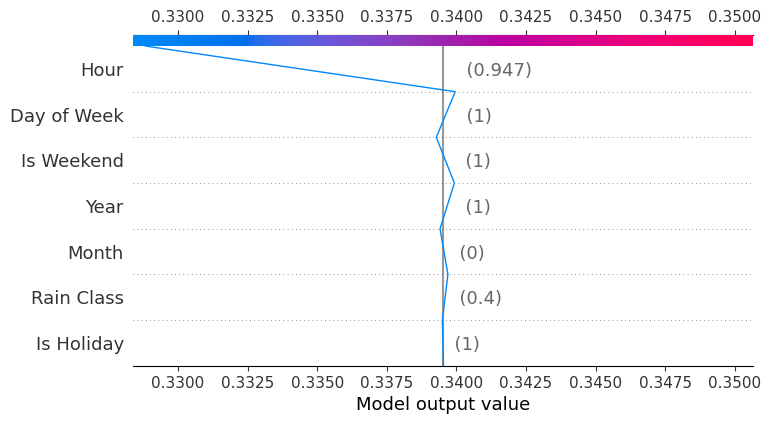

SHAP Decision Plot for index 7300 hour 23


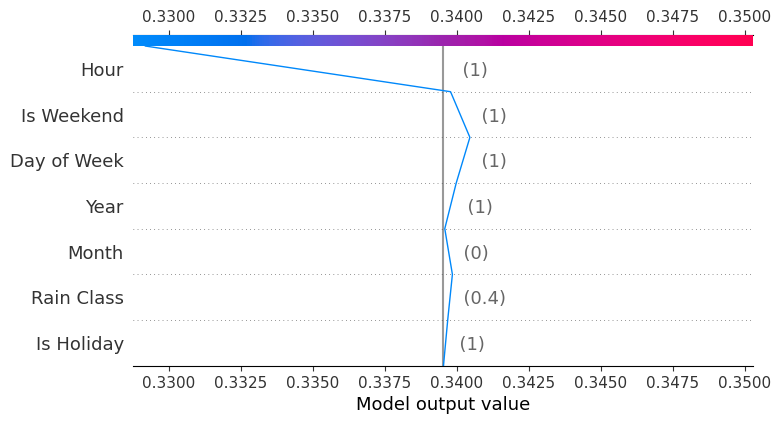

In [43]:
#SHAP Decision Plot for (January 1, 2023) notable features; Holiday, Weekend Sunday
data_index = 7302
#shap.decision_plot(expected_value, shap_values_avg[data_index], X_test_flat[data_index], feature_names=feature_names)
for i in range(20):
    current_index = data_index - 21 + i
    print(f"SHAP Decision Plot for index {current_index} hour {4+i}")
    shap.decision_plot(expected_value, shap_values_avg[current_index], X_test_flat[current_index], feature_names=feature_names)

SHAP Decision Plot for index 11781 hour 4


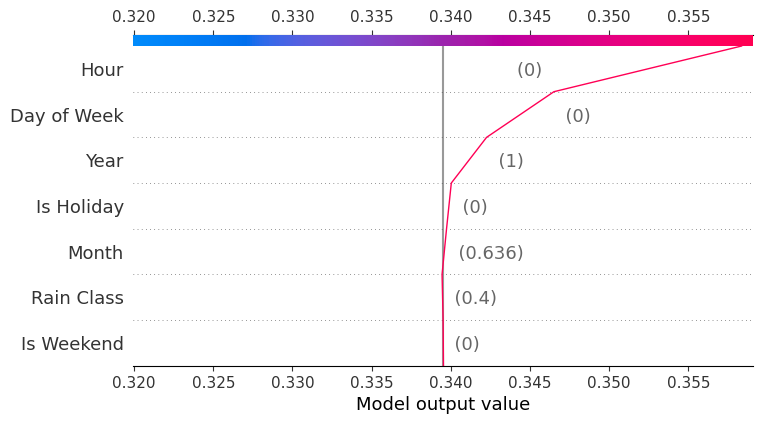

SHAP Decision Plot for index 11782 hour 5


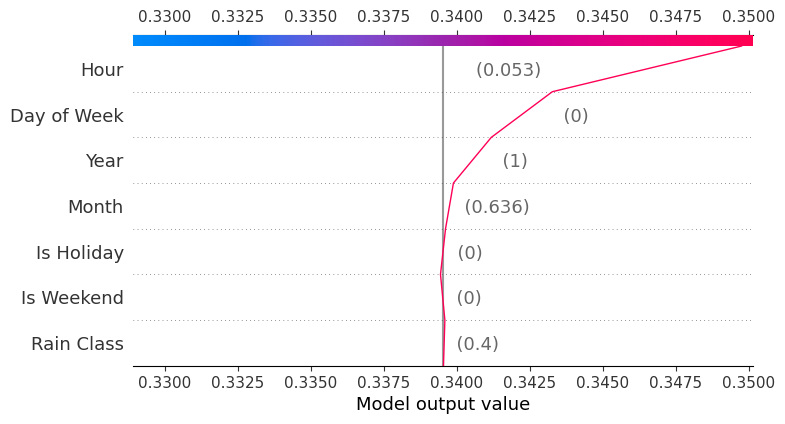

SHAP Decision Plot for index 11783 hour 6


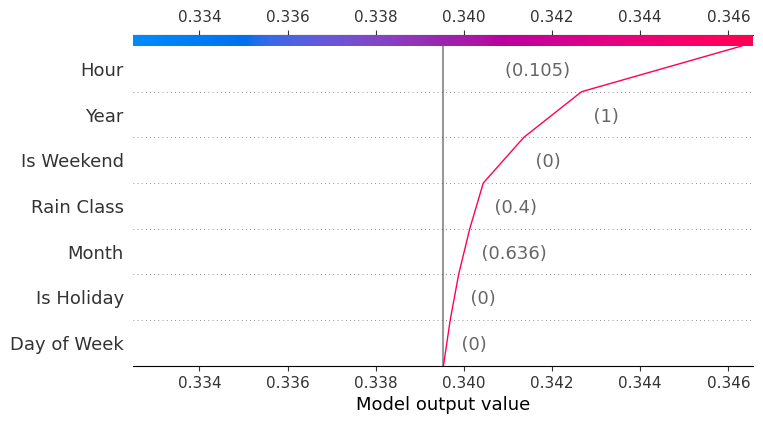

SHAP Decision Plot for index 11784 hour 7


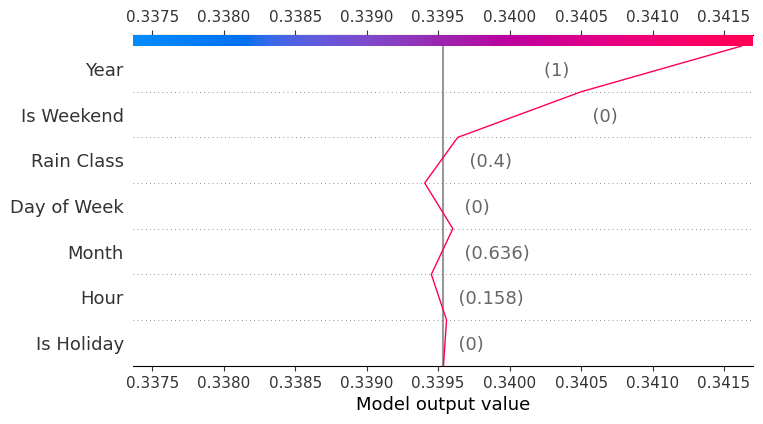

SHAP Decision Plot for index 11785 hour 8


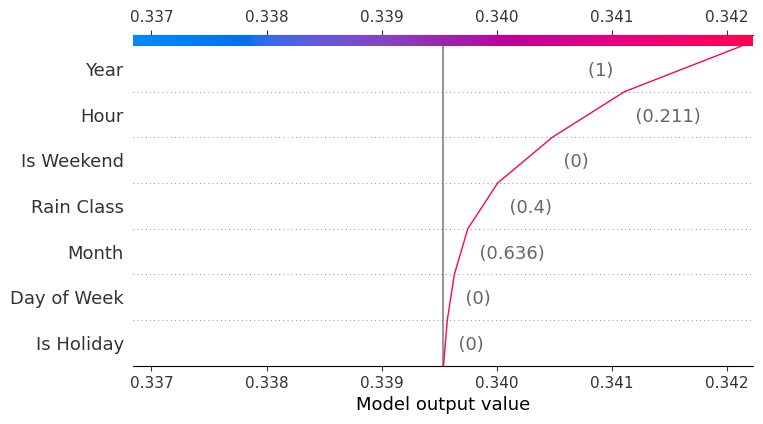

SHAP Decision Plot for index 11786 hour 9


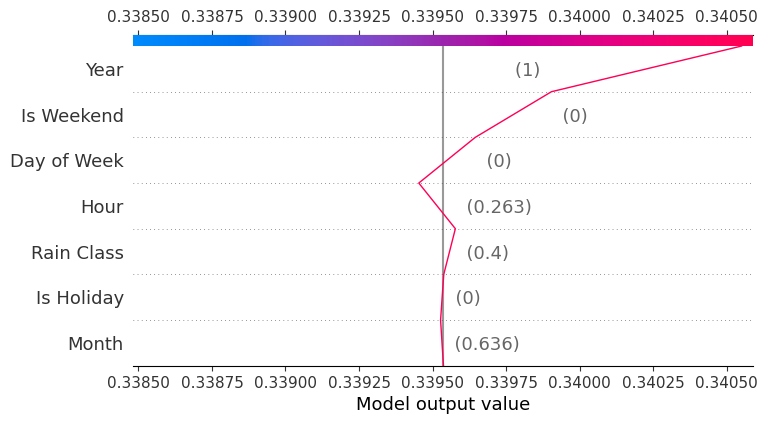

SHAP Decision Plot for index 11787 hour 10


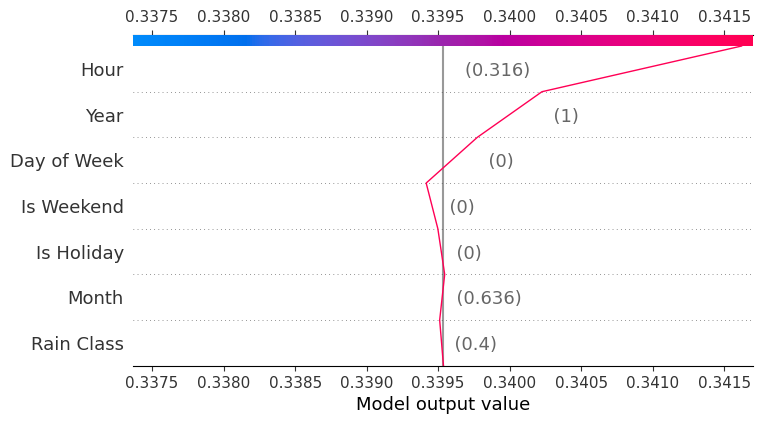

SHAP Decision Plot for index 11788 hour 11


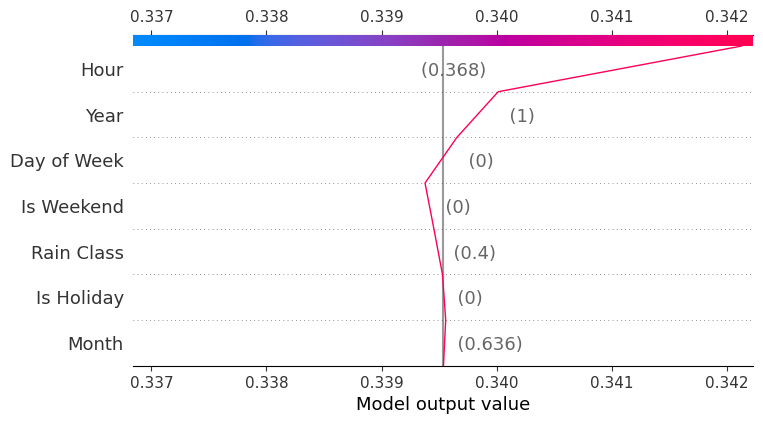

SHAP Decision Plot for index 11789 hour 12


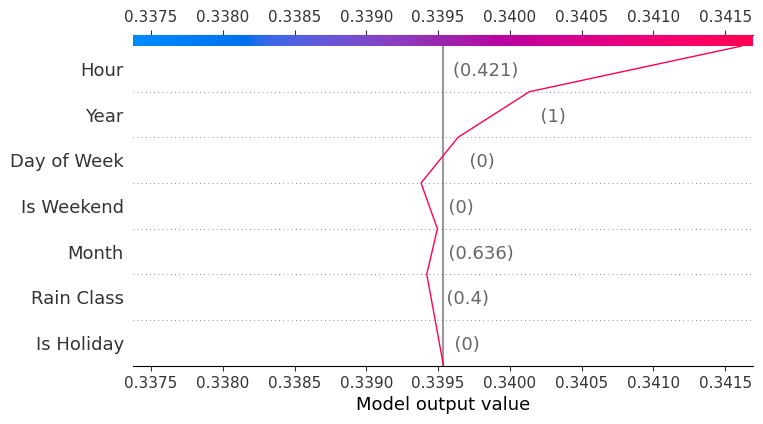

SHAP Decision Plot for index 11790 hour 13


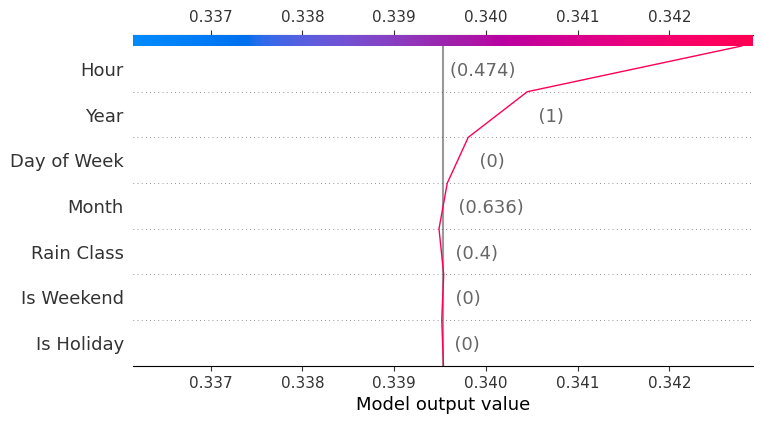

SHAP Decision Plot for index 11791 hour 14


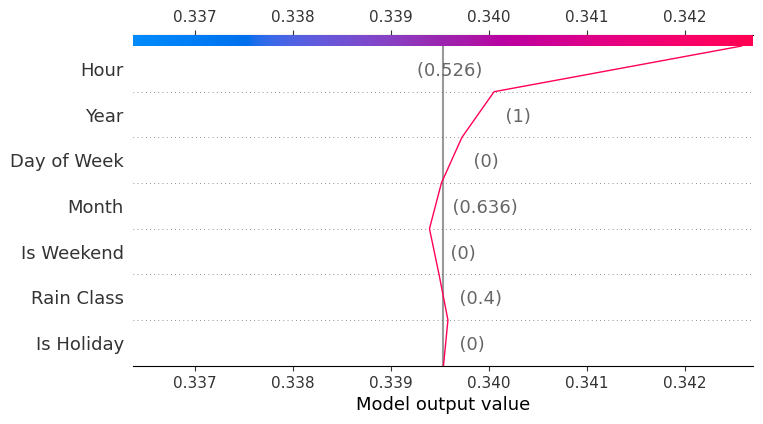

SHAP Decision Plot for index 11792 hour 15


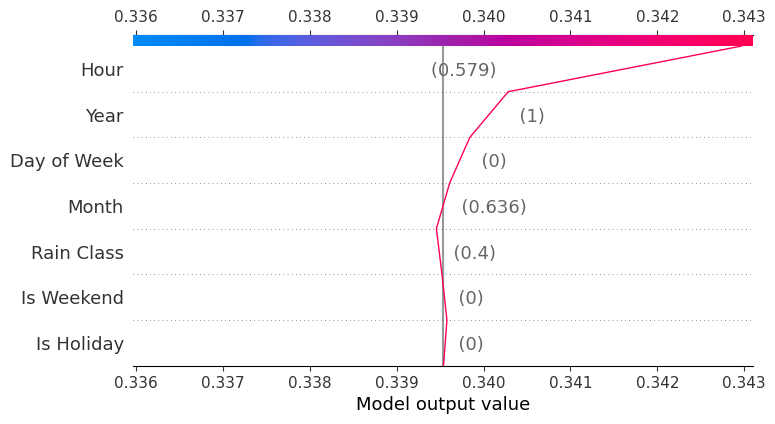

SHAP Decision Plot for index 11793 hour 16


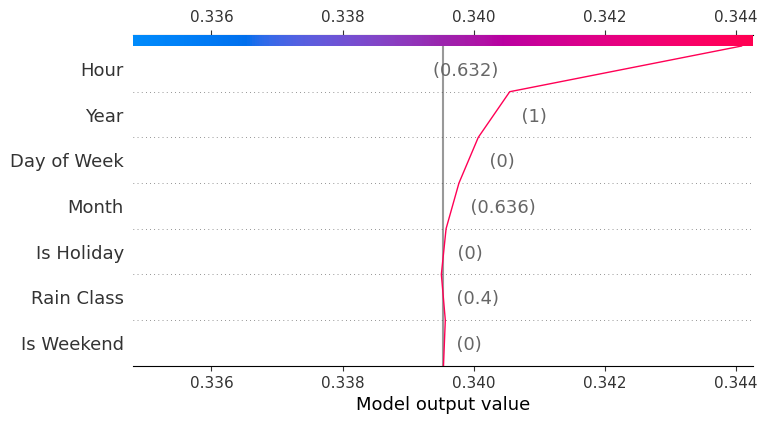

SHAP Decision Plot for index 11794 hour 17


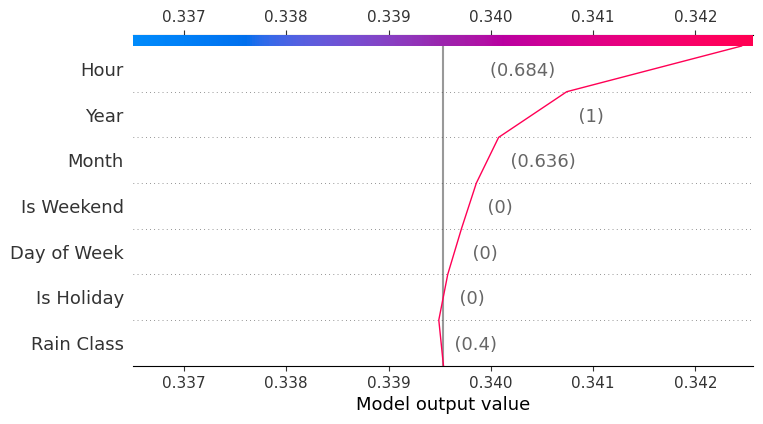

SHAP Decision Plot for index 11795 hour 18


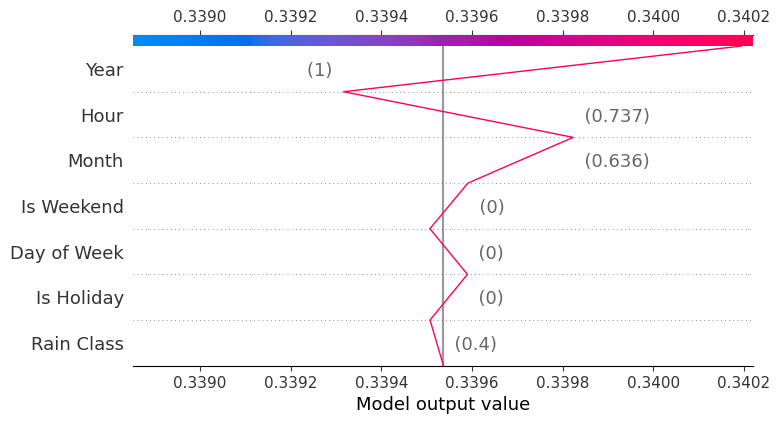

SHAP Decision Plot for index 11796 hour 19


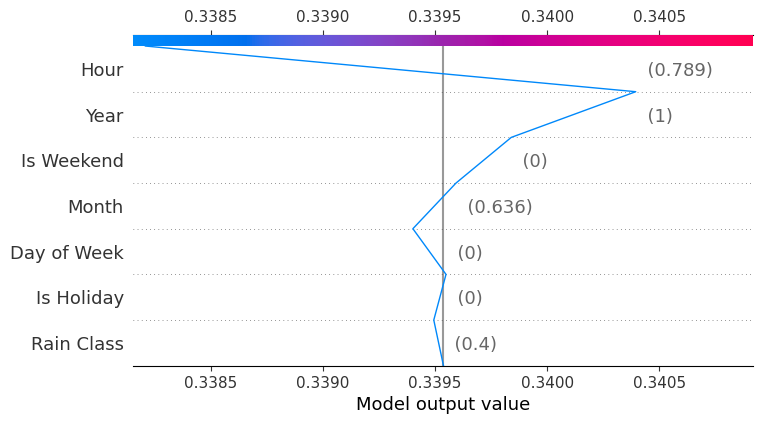

SHAP Decision Plot for index 11797 hour 20


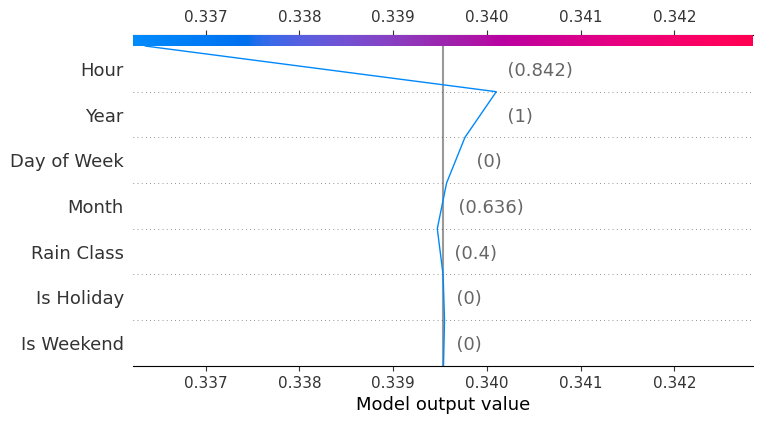

SHAP Decision Plot for index 11798 hour 21


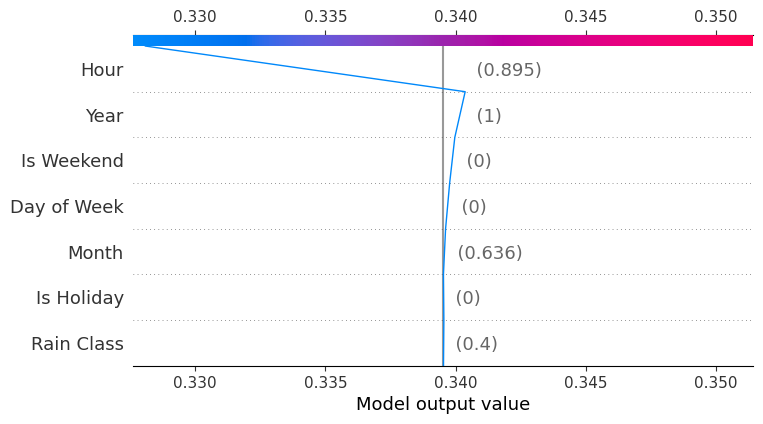

SHAP Decision Plot for index 11799 hour 22


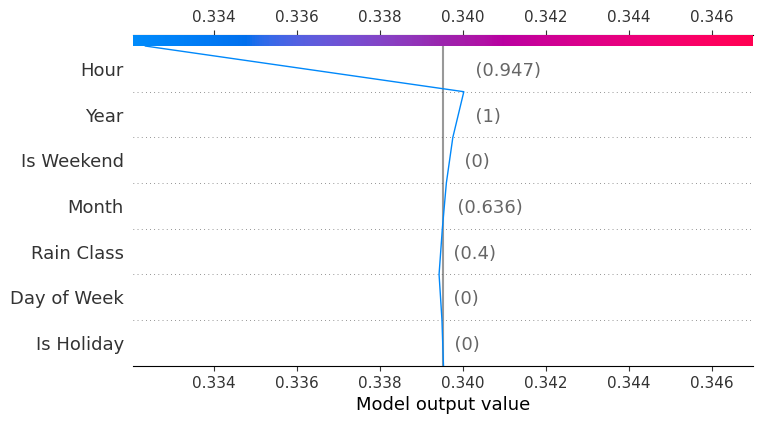

SHAP Decision Plot for index 11800 hour 23


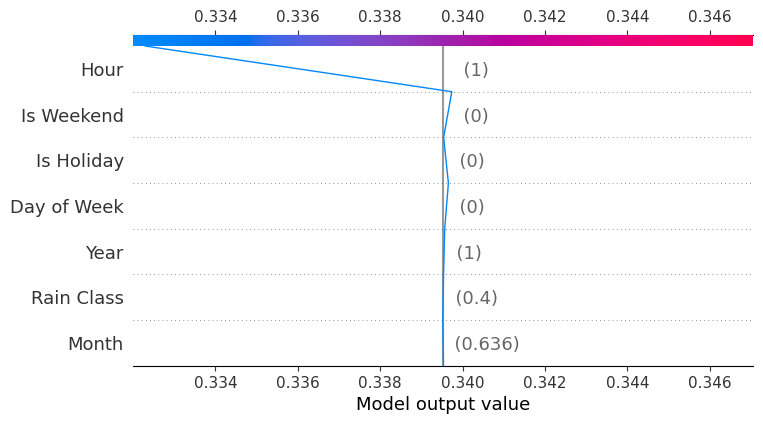

In [44]:
#SHAP Decision Plot for (August 14, 2023) Notable features; Monday
data_index = 11802
for i in range(20):
    current_index = data_index - 21 + i
    print(f"SHAP Decision Plot for index {current_index} hour {4+i}")
    shap.decision_plot(expected_value, shap_values_avg[current_index], X_test_flat[current_index], feature_names=feature_names)

SHAP Decision Plot for index 6001 hour 4


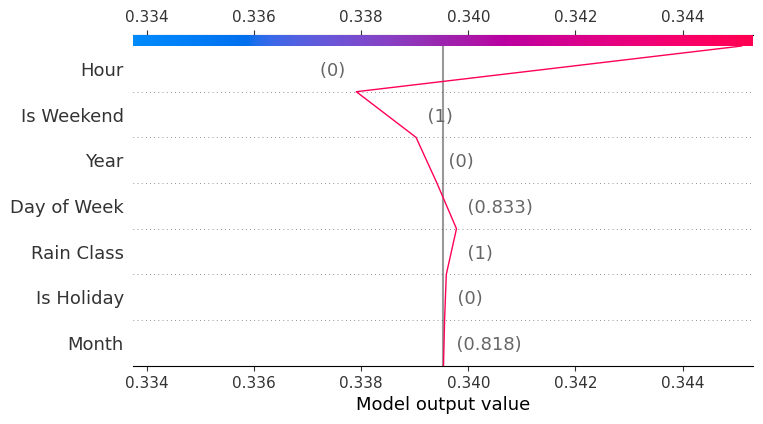

SHAP Decision Plot for index 6002 hour 5


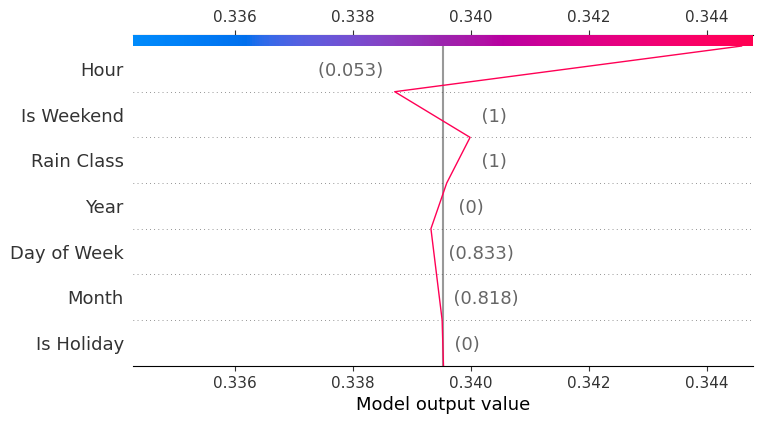

SHAP Decision Plot for index 6003 hour 6


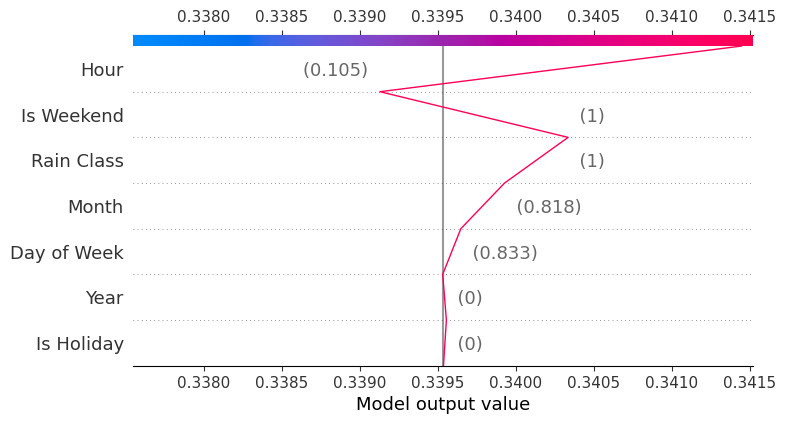

SHAP Decision Plot for index 6004 hour 7


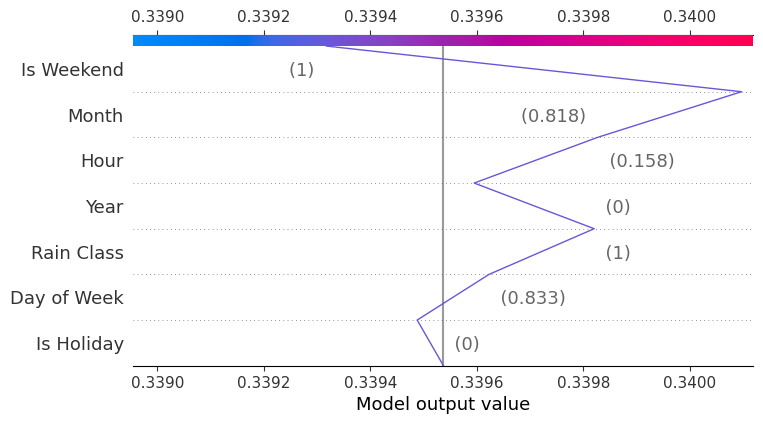

SHAP Decision Plot for index 6005 hour 8


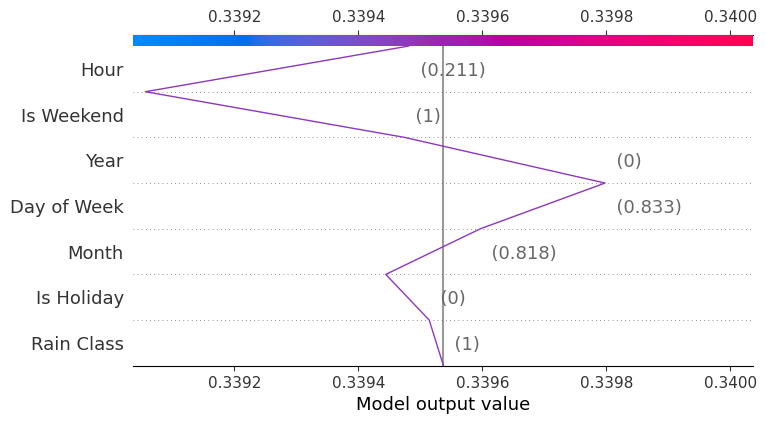

SHAP Decision Plot for index 6006 hour 9


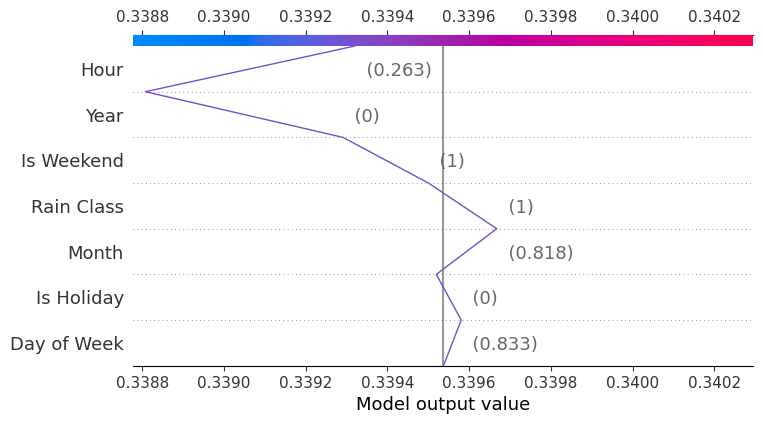

SHAP Decision Plot for index 6007 hour 10


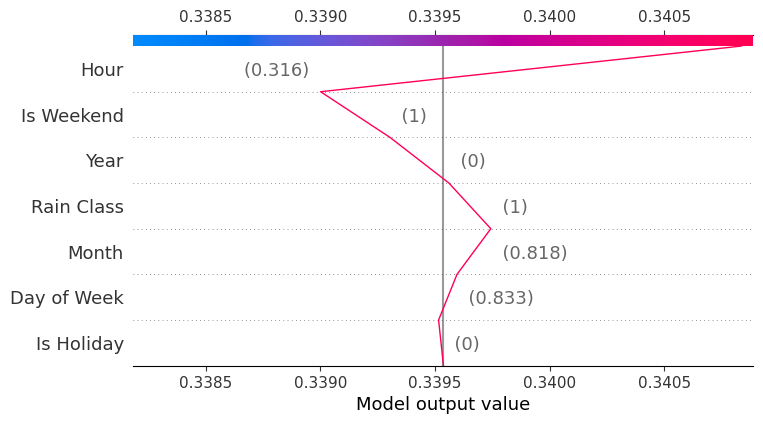

SHAP Decision Plot for index 6008 hour 11


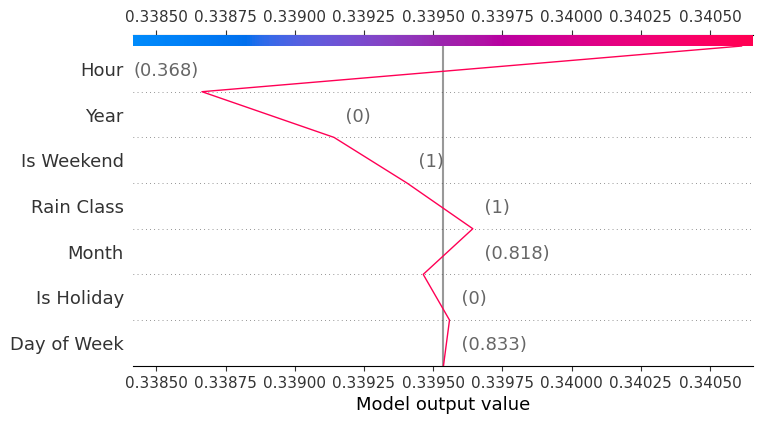

SHAP Decision Plot for index 6009 hour 12


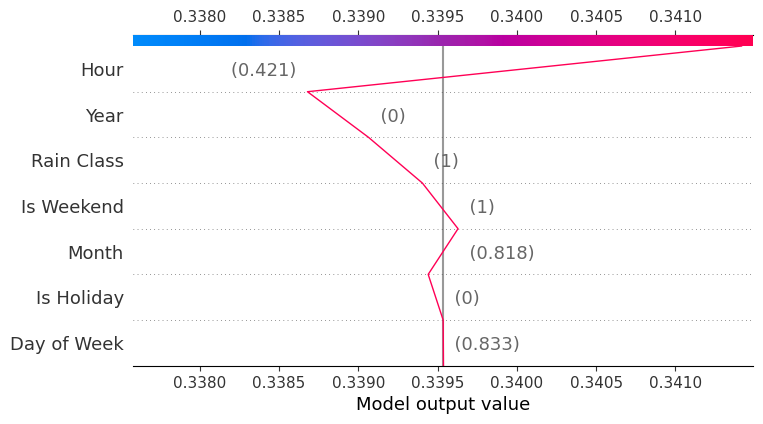

SHAP Decision Plot for index 6010 hour 13


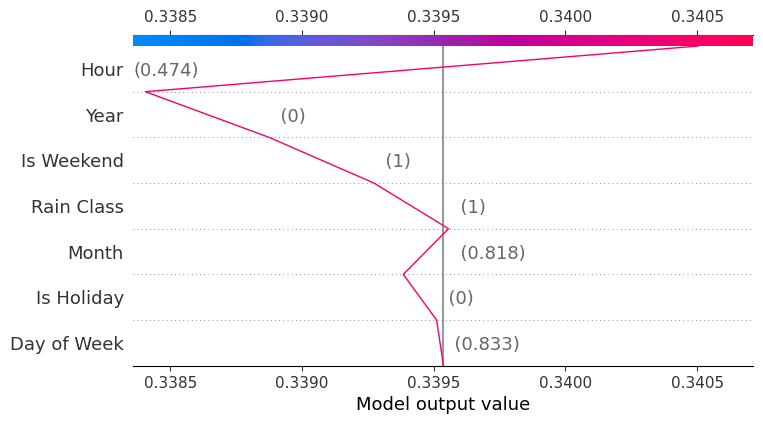

SHAP Decision Plot for index 6011 hour 14


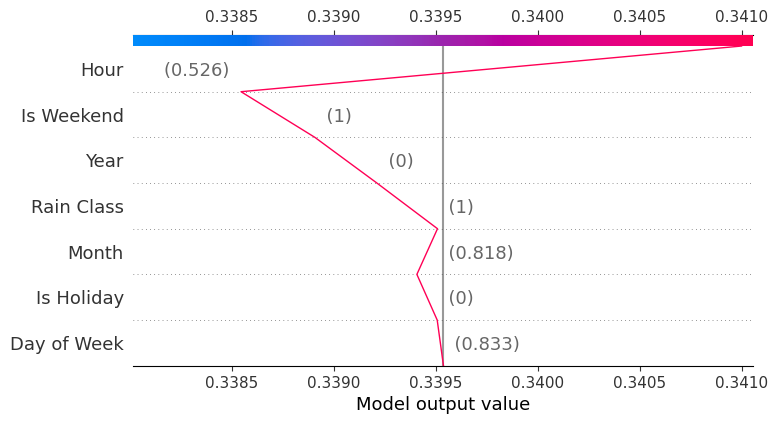

SHAP Decision Plot for index 6012 hour 15


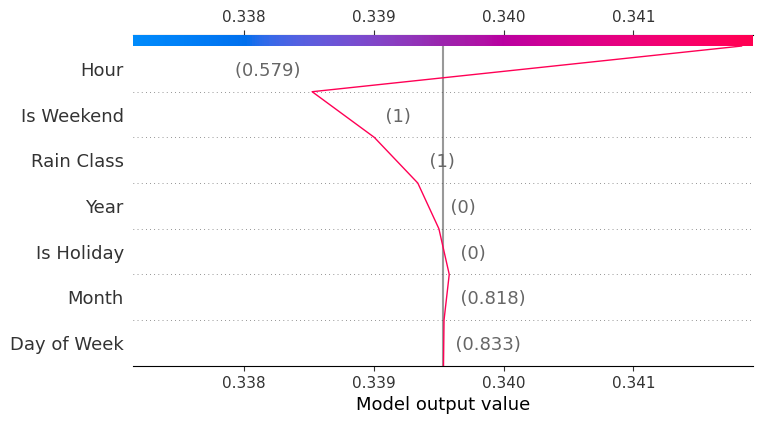

SHAP Decision Plot for index 6013 hour 16


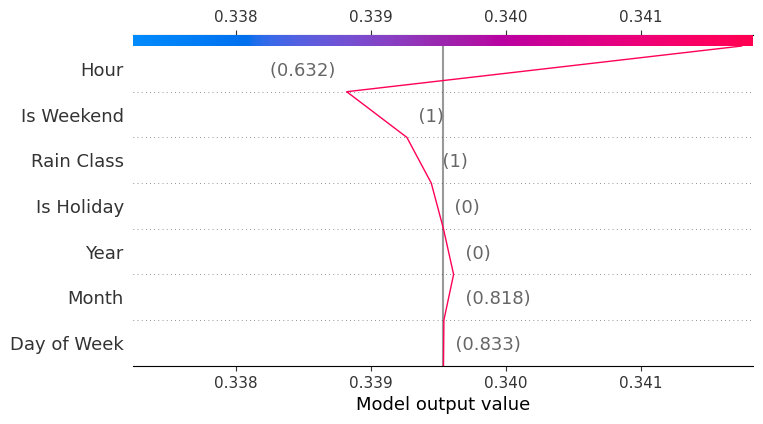

SHAP Decision Plot for index 6014 hour 17


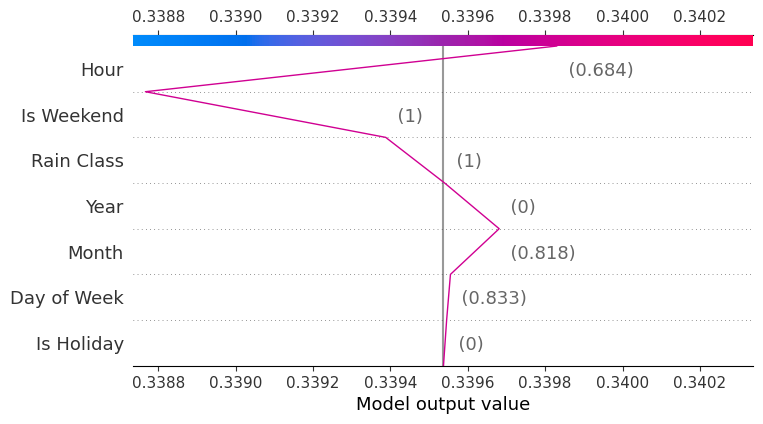

SHAP Decision Plot for index 6015 hour 18


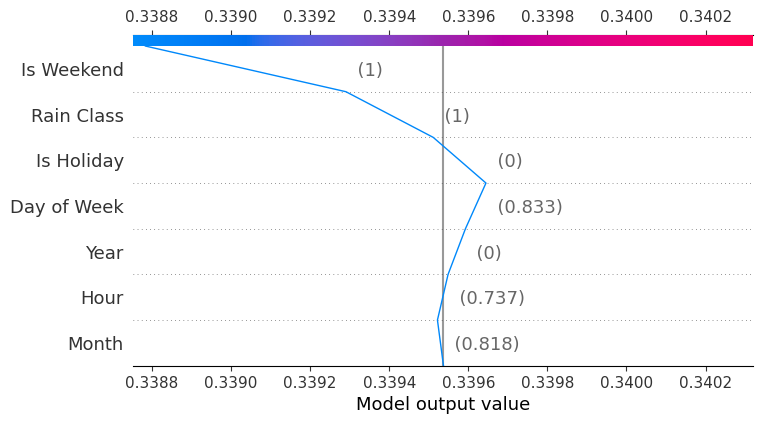

SHAP Decision Plot for index 6016 hour 19


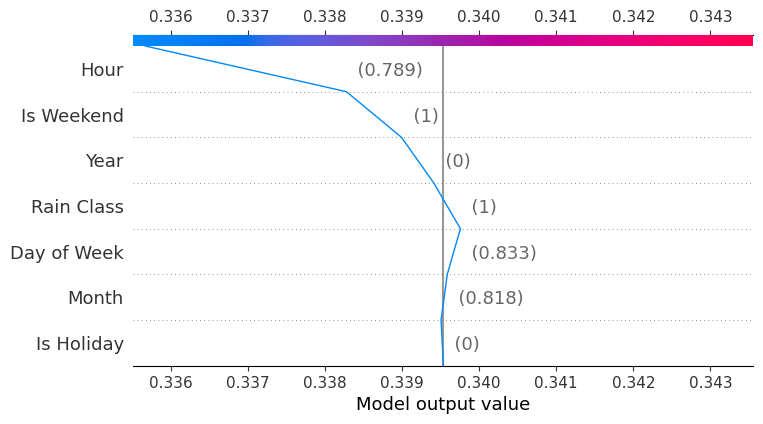

SHAP Decision Plot for index 6017 hour 20


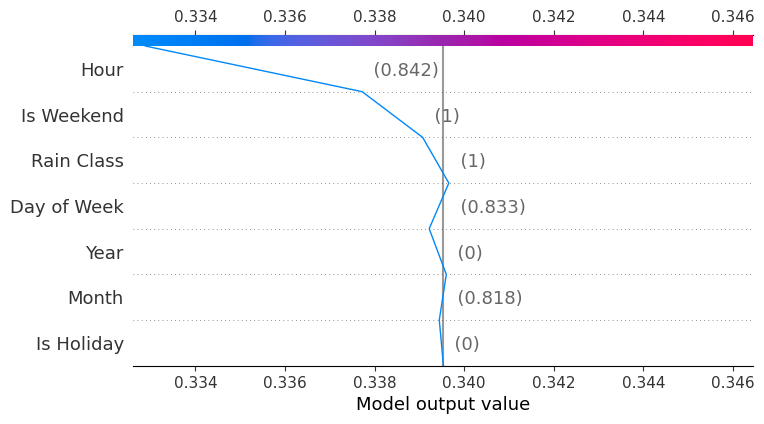

SHAP Decision Plot for index 6018 hour 21


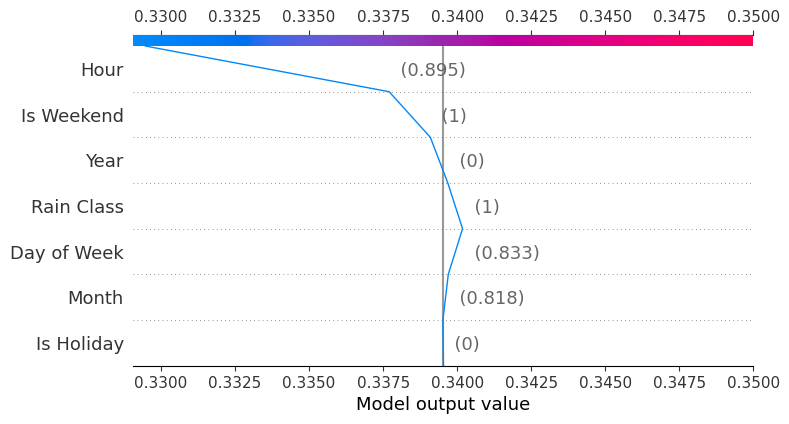

SHAP Decision Plot for index 6019 hour 22


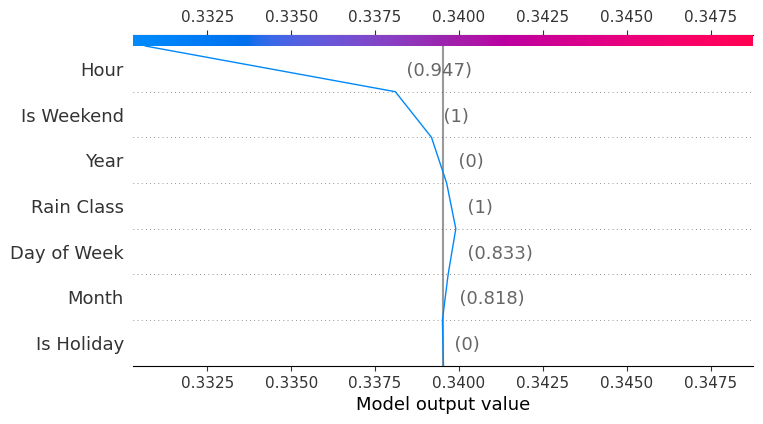

SHAP Decision Plot for index 6020 hour 23


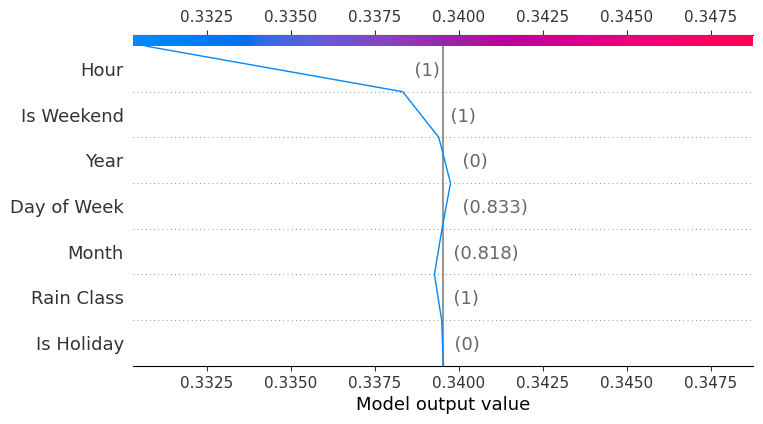

In [45]:
#SHAP Decision Plot for (October 29, 2022) notable features; Weekend Saturday, Rain Class 5: Severe Rain
data_index = 6022
#shap.decision_plot(expected_value, shap_values_avg[data_index], X_test_flat[data_index], feature_names=feature_names)
for i in range(20):
    current_index = data_index - 21 + i
    print(f"SHAP Decision Plot for index {current_index} hour {4+i}")
    shap.decision_plot(expected_value, shap_values_avg[current_index], X_test_flat[current_index], feature_names=feature_names)

c:\Users\inspiron-7460\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:225: UserWarning:

The structure of `inputs` doesn't match the expected structure: keras_tensor. Received: the structure of inputs=['*']



Averaged SHAP values shape for the instance: (8,)
Instance feature values shape: (1, 7)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


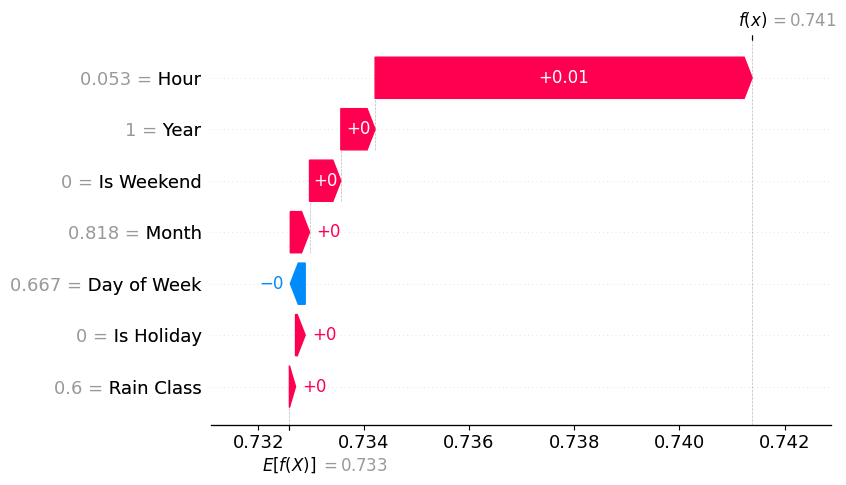

In [46]:
# Select a specific instance from X_test
instance_index = 0  # Change this index to select different instances
instance = X_test[instance_index:instance_index + 1]

# Compute SHAP values for the specific instance
shap_values_instance = explainer.shap_values(instance)

# Reshape the SHAP values to (n_timesteps, n_features) for the selected instance
shap_values_instance_flat = shap_values_instance.reshape(instance.shape[1], -1)  # Adjust the shape as needed

# Average SHAP values across time steps (or you can pick one specific time step)
shap_values_instance_avg = np.mean(shap_values_instance_flat, axis=0)  # Averaging over time steps
print("Averaged SHAP values shape for the instance:", shap_values_instance_avg.shape)

# Prepare the corresponding feature values (excluding the 'Entry' target variable)
instance_features = instance[:, -1, :-1]  # Take the last time step and exclude 'Entry'
print("Instance feature values shape:", instance_features.shape)

# Define feature names according to your dataset (excluding 'Entry')
feature_names = ['Hour', 'Day of Week', 'Is Weekend', 'Is Holiday', 'Month', 'Year', 'Rain Class']

# Compute the model output for the selected instance
model_output = model.predict(instance)  # Get the model's predicted output for the instance

# Plot the SHAP waterfall plot for the specific instance
shap.waterfall_plot(
    shap.Explanation(values=shap_values_instance_avg[:len(feature_names)],  # Ensure the length matches feature names
                     base_values=model_output[0],  # Use the model's output as the base value
                     data=instance_features[0],  # Feature values for this instance
                     feature_names=feature_names)
)

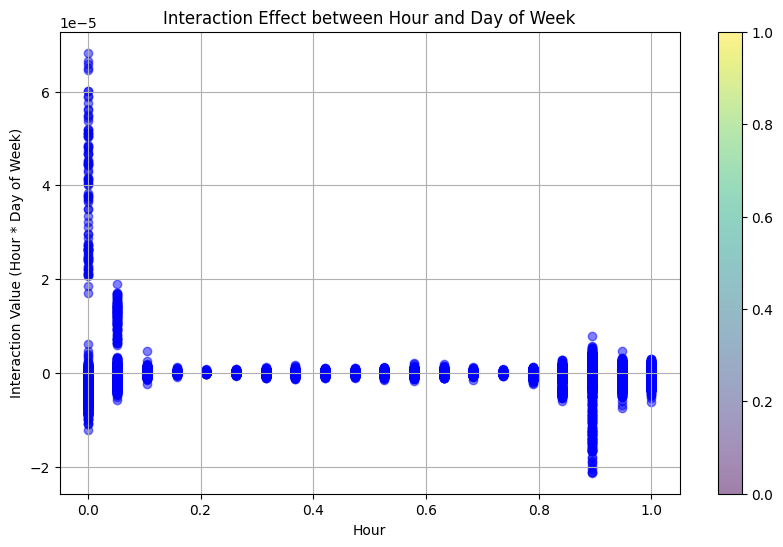

In [47]:
# 5. Manually calculate and plot interaction effects for the first two features (Hour and Day of Week)
# Note: This is a manual workaround, assuming interaction effects are calculated based on shap values
interaction_values = shap_values_avg[:, 0] * shap_values_avg[:, 1]  # Replace 0 and 1 with the indices of features you want to analyze
plt.figure(figsize=(10, 6))
plt.scatter(X_test_flat[:, 0], interaction_values, c='blue', alpha=0.5)
plt.colorbar()
plt.xlabel('Hour')
plt.ylabel('Interaction Value (Hour * Day of Week)')
plt.title('Interaction Effect between Hour and Day of Week')
plt.grid()
plt.show()

In [48]:
# Load the scalers
scaler = joblib.load('model/scaler_features.pkl')
scaler_entry = joblib.load('model/scaler_entry.pkl')

# Select a random starting index
random_start_index = np.random.randint(0, len(df_model) - 19)

# Select the next 19 rows starting from the random index
random_rows = df_model.iloc[random_start_index:random_start_index + 19]

# Inverse scale the selected rows
random_rows_inverse_scaled = random_rows.copy()
random_rows_inverse_scaled[random_rows.columns[:-1]] = scaler.inverse_transform(random_rows[random_rows.columns[:-1]])
random_rows_inverse_scaled['Entry'] = scaler_entry.inverse_transform(random_rows[['Entry']])


In [49]:
# Manually input the 20th row
manual_row = pd.DataFrame({
    'hour': [4],
    'day_of_week': [5],
    'is_weekend': [0],
    'is_holiday': [0],
    'month': [1],
    'year': [2030],
    'rain_class': [5],
    'Entry': [0]  # Placeholder for the entry value
})

In [50]:
# Combine the random rows and the manual row
input_df = pd.concat([random_rows_inverse_scaled, manual_row], ignore_index=True)

# Scale the input DataFrame
input_df_scaled = input_df.copy()
input_df_scaled[input_df.columns[:-1]] = scaler.transform(input_df[input_df.columns[:-1]])
input_df_scaled['Entry'] = scaler_entry.transform(input_df[['Entry']])  # Scale 'Entry'

# Prepare the input for the model
input_data = input_df_scaled.values.reshape((1, 20, -1))  # Adjust the shape to match the model's expected input

# Make predictions using the model
predictions = model.predict(input_data)

# Write the prediction to the 19th index of the DataFrame
input_df.at[19, 'Entry'] = scaler_entry.inverse_transform(predictions)[0, 0]
input_df.head(20)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


hour  day_of_week  is_weekend  is_holiday  month    year  rain_class  \
0   14.0          5.0         1.0         0.0   10.0  2023.0         0.0   
1   15.0          5.0         1.0         0.0   10.0  2023.0         0.0   
2   16.0          5.0         1.0         0.0   10.0  2023.0         0.0   
3   17.0          5.0         1.0         0.0   10.0  2023.0         0.0   
4   18.0          5.0         1.0         0.0   10.0  2023.0         0.0   
5   19.0          5.0         1.0         0.0   10.0  2023.0         0.0   
6   20.0          5.0         1.0         0.0   10.0  2023.0         0.0   
7   21.0          5.0         1.0         0.0   10.0  2023.0         0.0   
8   22.0          5.0         1.0         0.0   10.0  2023.0         0.0   
9   23.0          5.0         1.0         0.0   10.0  2023.0         0.0   
10   4.0          6.0         1.0         0.0   10.0  2023.0         0.0   
11   5.0          6.0         1.0         0.0   10.0  2023.0         0.0   
12   6.0          6.0         1.0         0.0   10.0  2023.0         0.0   
13   7.0          6.0         1.0         0.0   10.0  2023.0         0.0   
14   8.0          6.0         1.0         0.0   10.0  2023.0         0.0   
15   9.0          6.0         1.0         0.0   10.0  2023.0         0.0   
16  10.0          6.0         1.0         0.0   10.0  2023.0         0.0   
17  11.0          6.0         1.0         0.0   10.0  2023.0         0.0   
18  12.0          6.0         1.0         0.0   10.0  2023.0         0.0   
19   4.0          5.0         0.0         0.0    1.0  2030.0         5.0   

          Entry  
0   2875.000000  
1   3128.000000  
2   3538.000000  
3   3867.000000  
4   3558.000000  
5   3416.000000  
6   2675.000000  
7   2018.000000  
8     64.000000  
9      0.000000  
10     0.000000  
11  1380.000000  
12  1795.000000  
13  1999.000000  
14  2471.000000  
15  2606.000000  
16  2531.000000  
17  2455.000000  
18  2727.000000  
19  2858.517822